# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model. 

Code snippets and ideas from https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/



In [16]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import time
from sklearn.metrics import calinski_harabaz_score
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [39]:
def get_dominant_color(image, k, image_processing_size = (50, 50)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input


    """
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 

    clt = KMeans(n_clusters = k).fit(image)    
   
    
    clt_2 = MiniBatchKMeans(n_clusters = k-2).fit(image)
    clt_3 = MiniBatchKMeans(n_clusters = k-1).fit(image)
    clt_5 = MiniBatchKMeans(n_clusters = k+1).fit(image)
    clt_6 = MiniBatchKMeans(n_clusters = k+2).fit(image)
    clt_7 = MiniBatchKMeans(n_clusters = k+3).fit(image)
    clt_8 = MiniBatchKMeans(n_clusters = k+4).fit(image)
    clt_9 = MiniBatchKMeans(n_clusters = k+5).fit(image)
    clt_10 = MiniBatchKMeans(n_clusters = k+6).fit(image)
    clt_11 = MiniBatchKMeans(n_clusters = k+7).fit(image)
    clt_12 = MiniBatchKMeans(n_clusters = k+8).fit(image)
    
    clt_list = [clt, clt_2, clt_3, clt_5, clt_6, clt_7, clt_8, clt_9, clt_10,
                 clt_11,  clt_12]
    CH_score = []

    for model in clt_list:
        labels = model.labels_
        CH_score.append(calinski_harabaz_score(image, labels))
    
    plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], CH_score)
    plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    plt.title("Calinski Harabaz Scores for Different Values of K")
    plt.ylabel("Variance Ratio")
    plt.xlabel("K=")
    plt.show()
    
#     clt = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=45,
#                       n_init=10, max_no_improvement=10, verbose=0).fit(image)
    
    labels = clt.predict(image)
    
    #plot KMeans clusters to determine distance accuracy
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111, projection='3d')
    centers = clt.cluster_centers_
    ax1.scatter(centers[:,0], centers[:, 1], centers[:,2], c='black', s=70, alpha=1)
    x = image[:,0]
    y = image[:,1]
    z = image[:,2]
    ax1.scatter(x,y,z, marker=".", c=labels, s=5, alpha=0.2)
    plt.show()

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]
    dominant_color_4 = clt.cluster_centers_[label_counts.most_common(4)[3][0]]
    dominant_color_5 = clt.cluster_centers_[label_counts.most_common(5)[4][0]]
    dominant_color_6 = clt.cluster_centers_[label_counts.most_common(6)[5][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3), list(dominant_color_4), list(dominant_color_5), list(dominant_color_6)

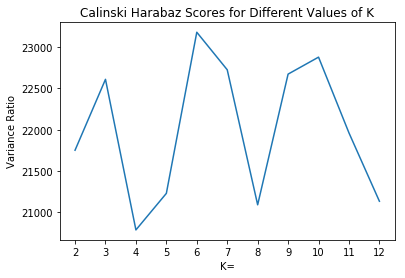

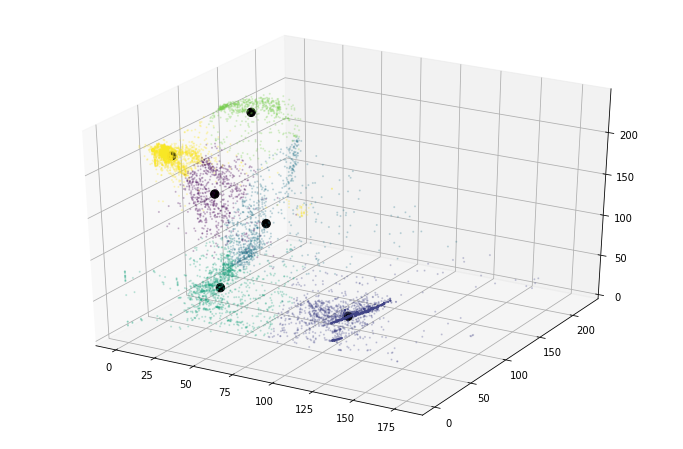

get_dominant_color function: 1.692s

Most prominent color:
red: 11  green:  16  blue:  18 
Hex:  #0b1012

Second color:
red: 215  green:  16  blue:  194 
Hex:  #d7d0c2

Third color:
red: 40  green:  16  blue:  30 
Hex:  #28271e

Fourth color:
red: 71  green:  51  blue:  29 
Hex:  #47331d

Fifth color:
red: 142  green:  124  blue:  98 
Hex:  #8e7c62

Sixth color:
red: 208  green:  134  blue:  91 
Hex:  #d0865b


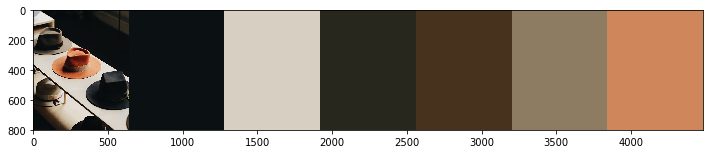

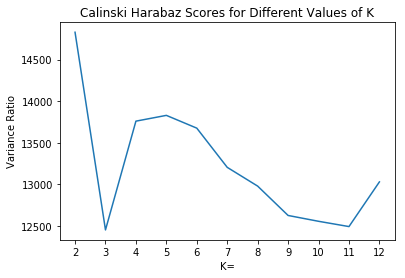

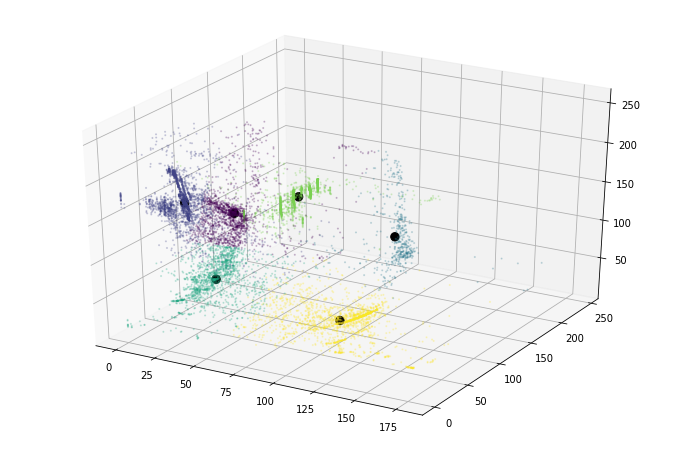

get_dominant_color function: 1.512s

Most prominent color:
red: 166  green:  159  blue:  142 
Hex:  #a69f8e

Second color:
red: 214  green:  159  blue:  220 
Hex:  #d6d9dc

Third color:
red: 18  green:  159  blue:  26 
Hex:  #12171a

Fourth color:
red: 45  green:  40  blue:  31 
Hex:  #2d281f

Fifth color:
red: 110  green:  84  blue:  58 
Hex:  #6e543a

Sixth color:
red: 10  green:  59  blue:  41 
Hex:  #0a3b29


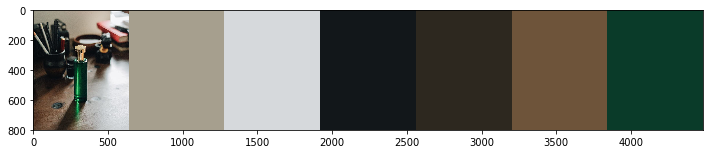

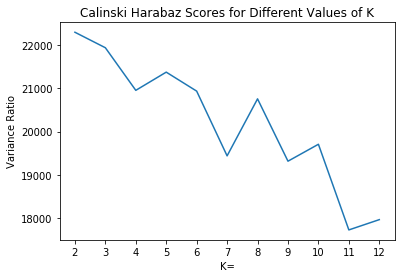

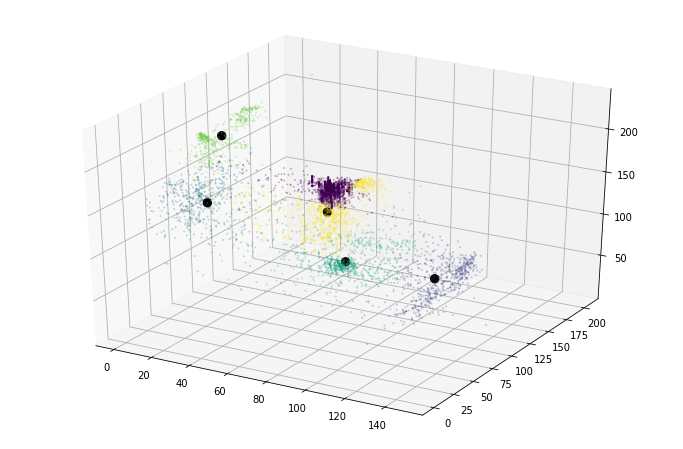

get_dominant_color function: 1.615s

Most prominent color:
red: 206  green:  211  blue:  215 
Hex:  #ced3d7

Second color:
red: 157  green:  211  blue:  176 
Hex:  #9dadb0

Third color:
red: 88  green:  211  blue:  109 
Hex:  #586a6d

Fourth color:
red: 15  green:  29  blue:  36 
Hex:  #0f1d24

Fifth color:
red: 135  green:  119  blue:  101 
Hex:  #877765

Sixth color:
red: 202  green:  168  blue:  134 
Hex:  #caa886


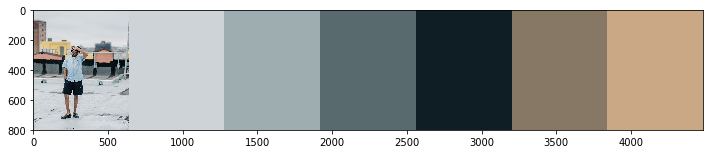

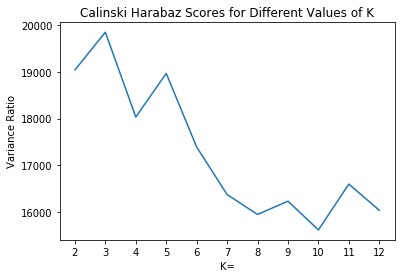

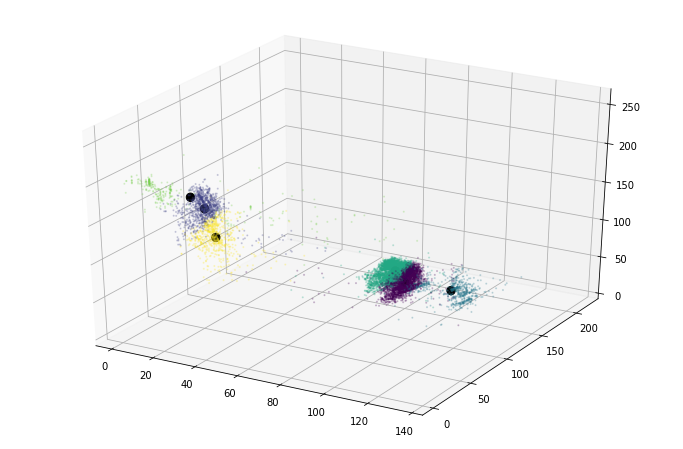

get_dominant_color function: 1.508s

Most prominent color:
red: 52  green:  78  blue:  83 
Hex:  #344e53

Second color:
red: 32  green:  78  blue:  58 
Hex:  #20373a

Third color:
red: 147  green:  78  blue:  114 
Hex:  #938772

Fourth color:
red: 16  green:  26  blue:  37 
Hex:  #101a25

Fifth color:
red: 104  green:  93  blue:  76 
Hex:  #685d4c

Sixth color:
red: 192  green:  192  blue:  182 
Hex:  #c0c0b6


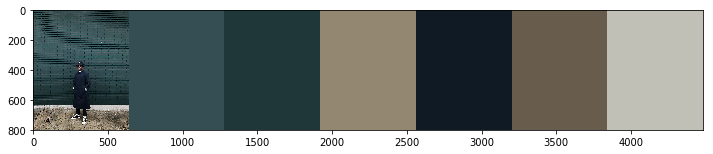

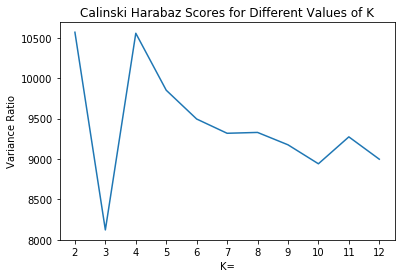

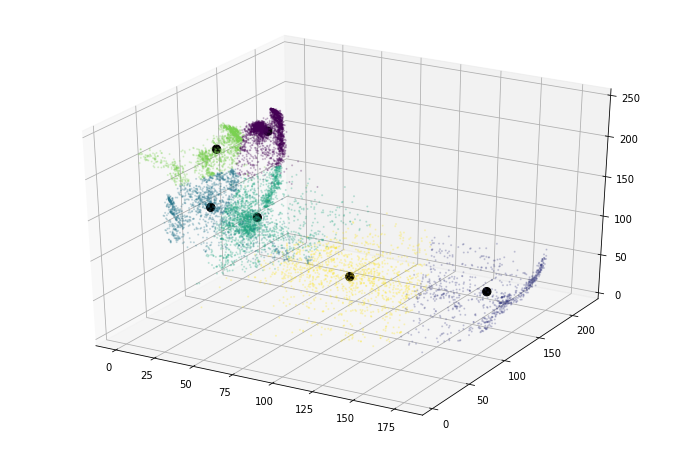

get_dominant_color function: 1.650s

Most prominent color:
red: 175  green:  88  blue:  57 
Hex:  #af5839

Second color:
red: 75  green:  88  blue:  30 
Hex:  #4b2b1e

Third color:
red: 123  green:  88  blue:  81 
Hex:  #7b6151

Fourth color:
red: 189  green:  142  blue:  115 
Hex:  #bd8e73

Fifth color:
red: 22  green:  43  blue:  38 
Hex:  #162b26

Sixth color:
red: 42  green:  18  blue:  34 
Hex:  #2a1222


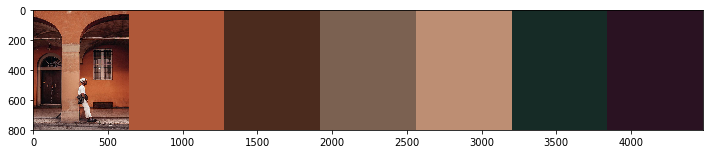

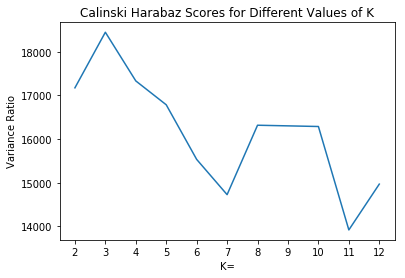

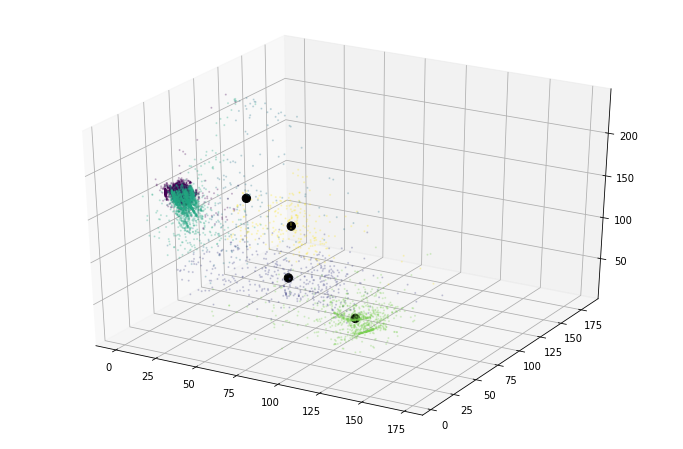

get_dominant_color function: 1.550s

Most prominent color:
red: 180  green:  178  blue:  167 
Hex:  #b4b2a7

Second color:
red: 155  green:  178  blue:  133 
Hex:  #9b9285

Third color:
red: 25  green:  178  blue:  33 
Hex:  #191c21

Fourth color:
red: 81  green:  93  blue:  90 
Hex:  #515d5a

Fifth color:
red: 157  green:  165  blue:  167 
Hex:  #9da5a7

Sixth color:
red: 118  green:  95  blue:  70 
Hex:  #765f46


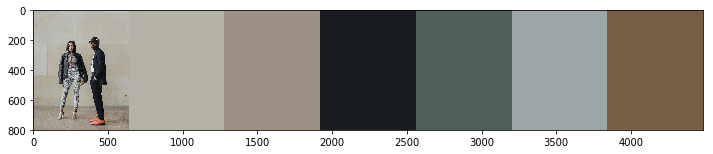

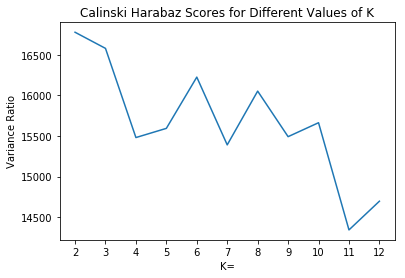

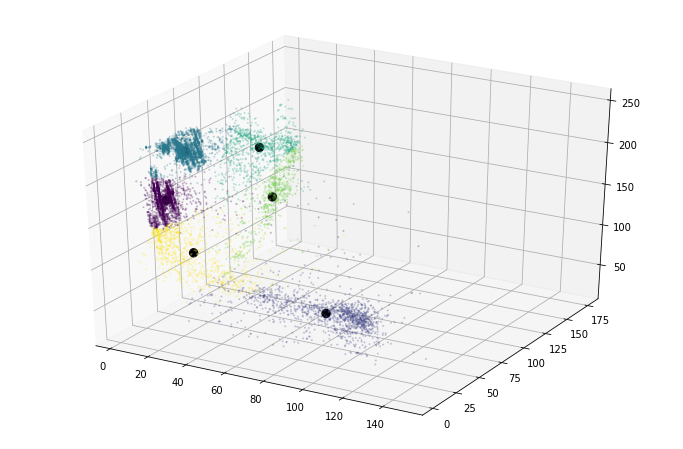

get_dominant_color function: 1.478s

Most prominent color:
red: 217  green:  199  blue:  181 
Hex:  #d9c7b5

Second color:
red: 171  green:  199  blue:  155 
Hex:  #aba29b

Third color:
red: 49  green:  199  blue:  57 
Hex:  #313a39

Fourth color:
red: 115  green:  114  blue:  105 
Hex:  #737269

Fifth color:
red: 172  green:  120  blue:  90 
Hex:  #ac785a

Sixth color:
red: 101  green:  65  blue:  47 
Hex:  #65412f


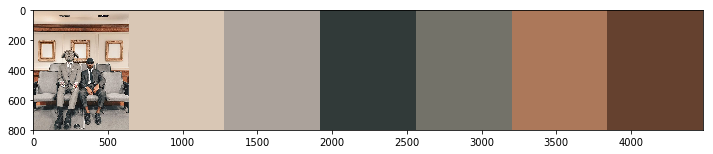

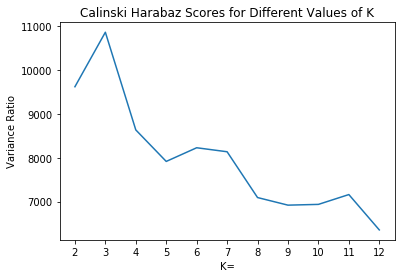

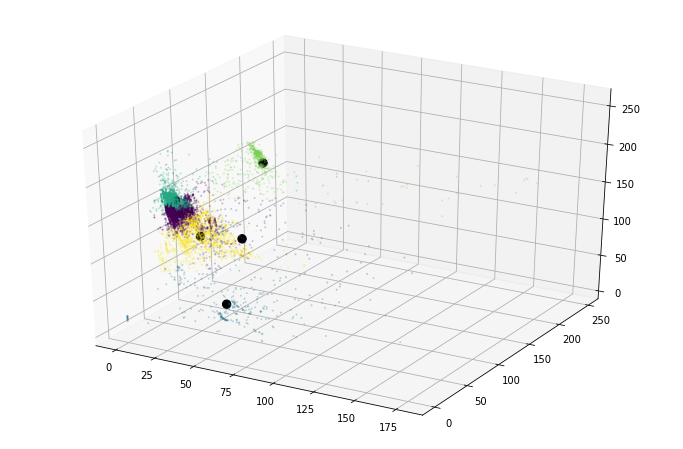

get_dominant_color function: 1.593s

Most prominent color:
red: 156  green:  150  blue:  137 
Hex:  #9c9689

Second color:
red: 175  green:  150  blue:  157 
Hex:  #afaa9d

Third color:
red: 117  green:  150  blue:  93 
Hex:  #75715d

Fourth color:
red: 163  green:  130  blue:  64 
Hex:  #a38240

Fifth color:
red: 39  green:  43  blue:  37 
Hex:  #272b25

Sixth color:
red: 79  green:  69  blue:  42 
Hex:  #4f452a


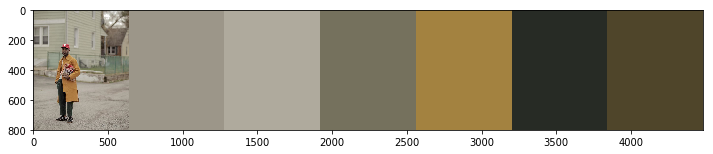

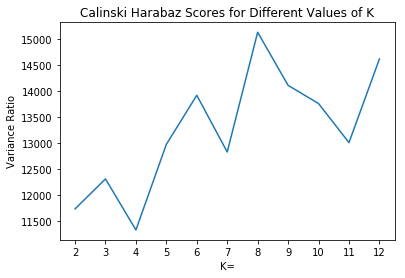

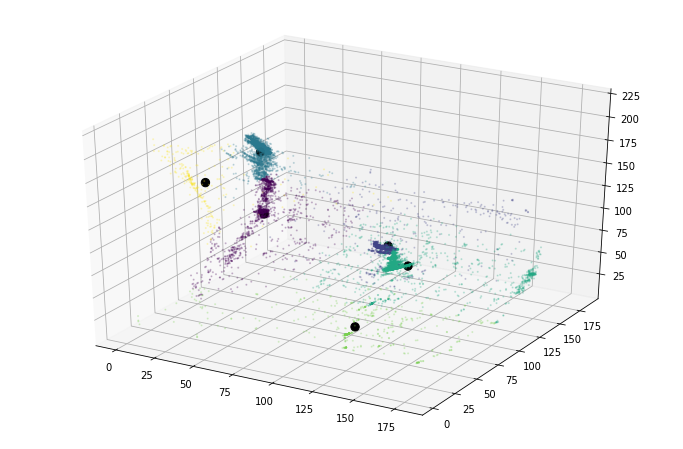

get_dominant_color function: 1.385s

Most prominent color:
red: 25  green:  34  blue:  49 
Hex:  #192231

Second color:
red: 133  green:  34  blue:  59 
Hex:  #85423b

Third color:
red: 47  green:  34  blue:  81 
Hex:  #2f3f51

Fourth color:
red: 67  green:  39  blue:  31 
Hex:  #43271f

Fifth color:
red: 15  green:  16  blue:  20 
Hex:  #0f1014

Sixth color:
red: 152  green:  142  blue:  121 
Hex:  #988e79


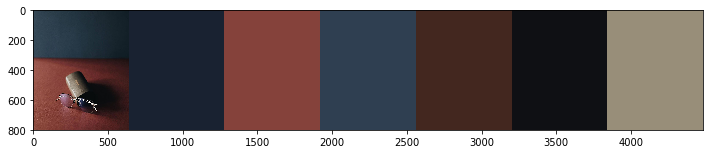

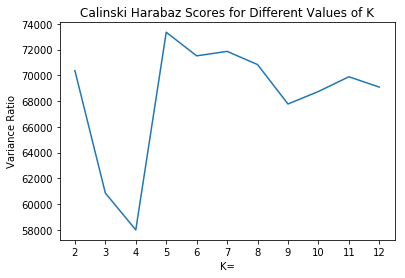

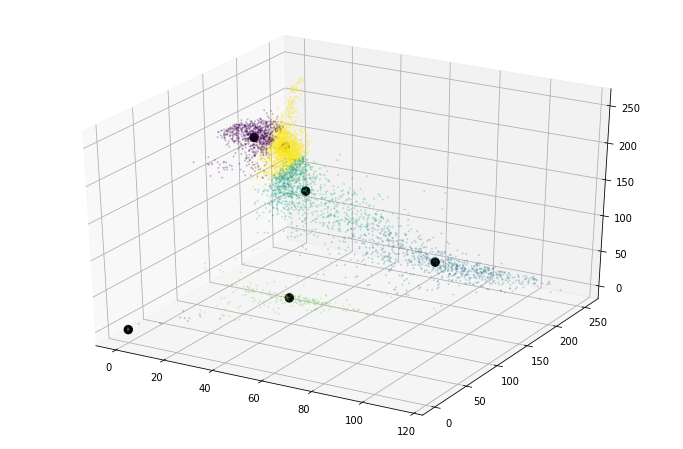

get_dominant_color function: 1.665s

Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 184  green:  0  blue:  64 
Hex:  #b89040

Third color:
red: 119  green:  0  blue:  35 
Hex:  #776923

Fourth color:
red: 222  green:  195  blue:  124 
Hex:  #dec37c

Fifth color:
red: 2  green:  21  blue:  6 
Hex:  #021506

Sixth color:
red: 6  green:  7  blue:  3 
Hex:  #060703


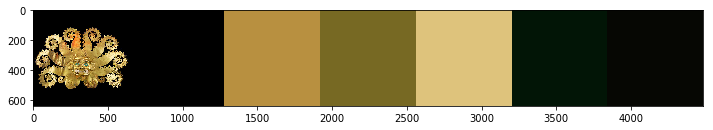

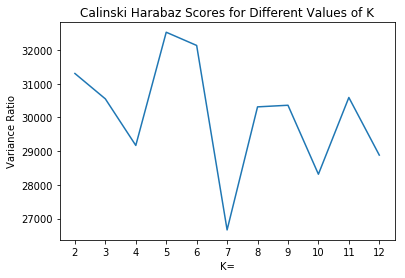

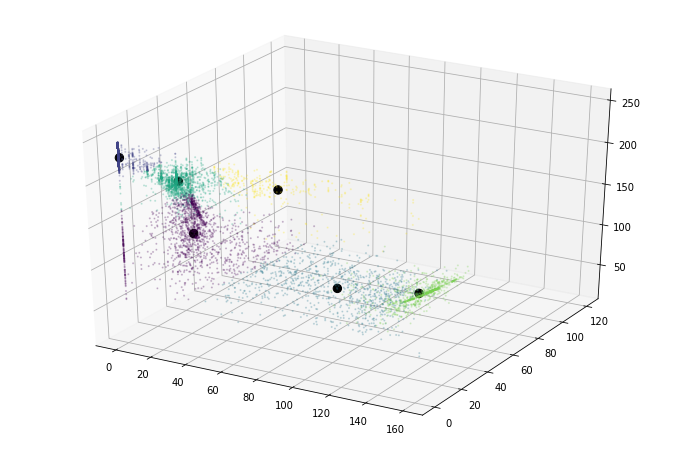

get_dominant_color function: 1.534s

Most prominent color:
red: 229  green:  229  blue:  229 
Hex:  #e5e5e5

Second color:
red: 208  green:  229  blue:  203 
Hex:  #d0cfcb

Third color:
red: 130  green:  229  blue:  119 
Hex:  #827f77

Fourth color:
red: 69  green:  79  blue:  80 
Hex:  #454f50

Fifth color:
red: 22  green:  28  blue:  33 
Hex:  #161c21

Sixth color:
red: 218  green:  221  blue:  220 
Hex:  #dadddc


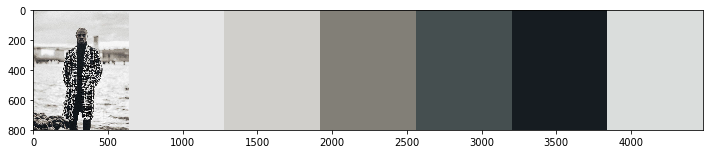

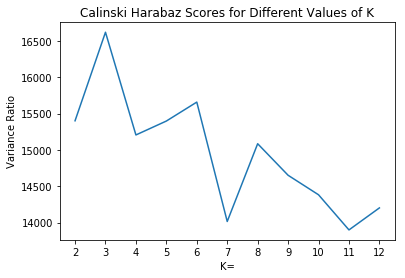

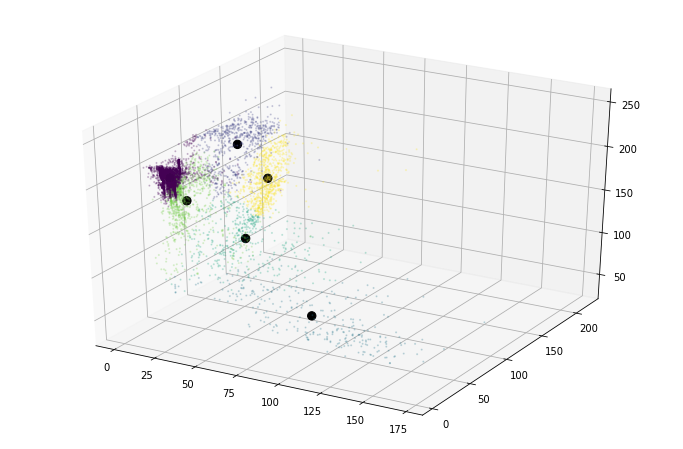

get_dominant_color function: 1.949s

Most prominent color:
red: 211  green:  208  blue:  197 
Hex:  #d3d0c5

Second color:
red: 174  green:  208  blue:  147 
Hex:  #aea693

Third color:
red: 137  green:  208  blue:  49 
Hex:  #894e31

Fourth color:
red: 198  green:  149  blue:  107 
Hex:  #c6956b

Fifth color:
red: 93  green:  79  blue:  52 
Hex:  #5d4f34

Sixth color:
red: 53  green:  64  blue:  65 
Hex:  #354041


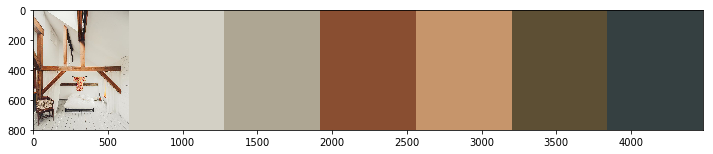

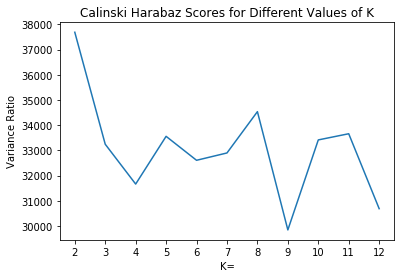

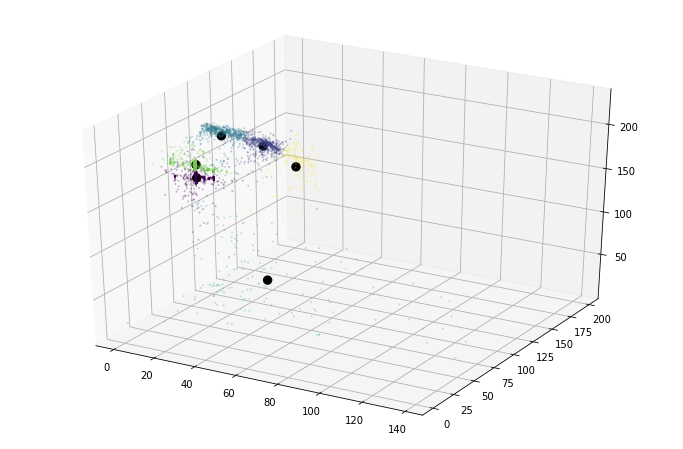

get_dominant_color function: 1.433s

Most prominent color:
red: 195  green:  197  blue:  190 
Hex:  #c3c5be

Second color:
red: 211  green:  197  blue:  207 
Hex:  #d3d4cf

Third color:
red: 162  green:  197  blue:  80 
Hex:  #a27650

Fourth color:
red: 197  green:  165  blue:  134 
Hex:  #c5a586

Fifth color:
red: 117  green:  75  blue:  39 
Hex:  #754b27

Sixth color:
red: 37  green:  40  blue:  27 
Hex:  #25281b


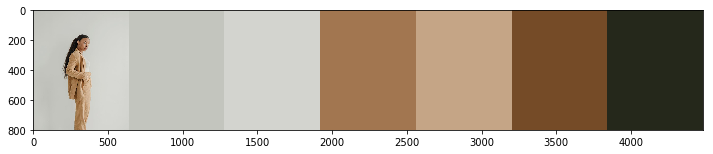

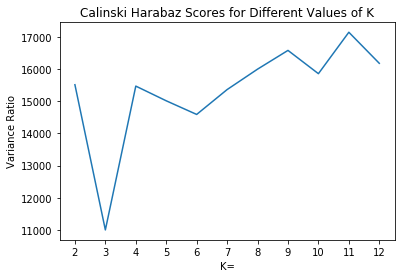

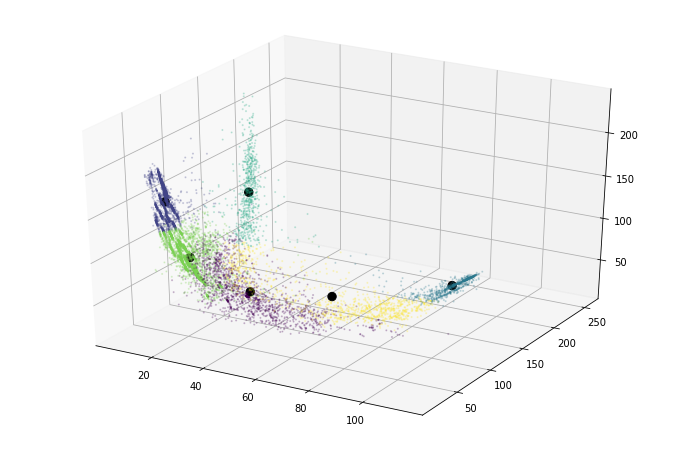

get_dominant_color function: 1.623s

Most prominent color:
red: 99  green:  94  blue:  80 
Hex:  #635e50

Second color:
red: 157  green:  94  blue:  127 
Hex:  #9d8c7f

Third color:
red: 51  green:  94  blue:  40 
Hex:  #333828

Fourth color:
red: 20  green:  36  blue:  18 
Hex:  #142412

Fifth color:
red: 4  green:  23  blue:  16 
Hex:  #041710

Sixth color:
red: 113  green:  62  blue:  37 
Hex:  #713e25


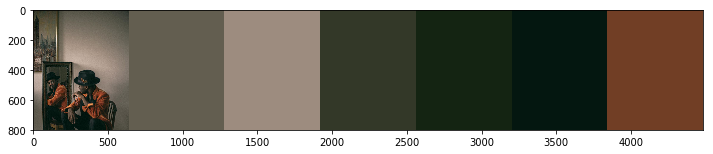

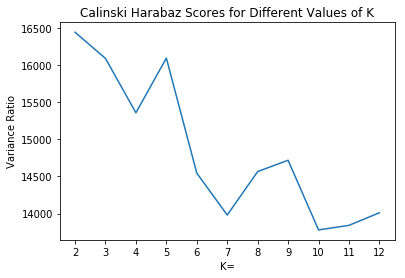

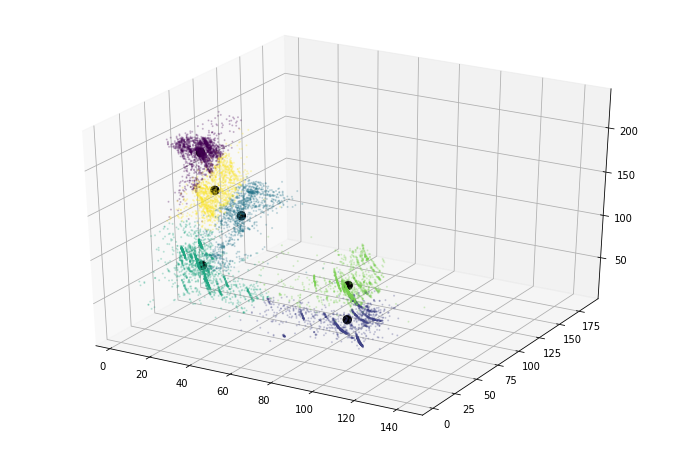

get_dominant_color function: 1.769s

Most prominent color:
red: 88  green:  87  blue:  79 
Hex:  #58574f

Second color:
red: 46  green:  87  blue:  53 
Hex:  #2e3335

Third color:
red: 83  green:  87  blue:  95 
Hex:  #535c5f

Fourth color:
red: 193  green:  172  blue:  149 
Hex:  #c1ac95

Fifth color:
red: 140  green:  118  blue:  99 
Hex:  #8c7663

Sixth color:
red: 91  green:  67  blue:  53 
Hex:  #5b4335


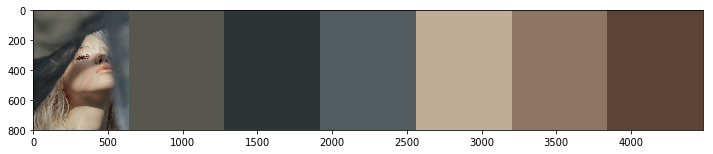

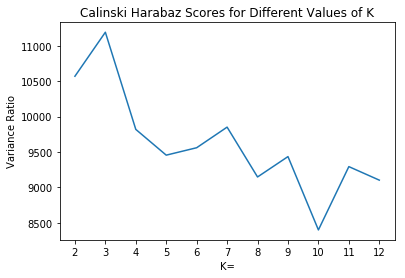

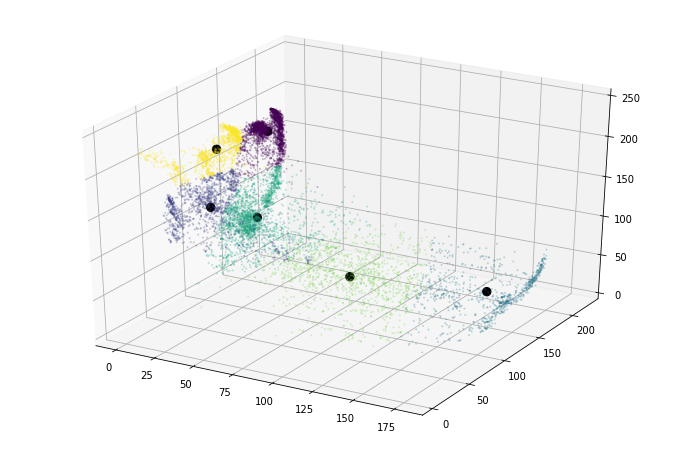

get_dominant_color function: 1.637s

Most prominent color:
red: 175  green:  88  blue:  57 
Hex:  #af5839

Second color:
red: 75  green:  88  blue:  30 
Hex:  #4b2b1e

Third color:
red: 123  green:  88  blue:  81 
Hex:  #7b6151

Fourth color:
red: 189  green:  142  blue:  115 
Hex:  #bd8e73

Fifth color:
red: 22  green:  43  blue:  38 
Hex:  #162b26

Sixth color:
red: 42  green:  18  blue:  34 
Hex:  #2a1222


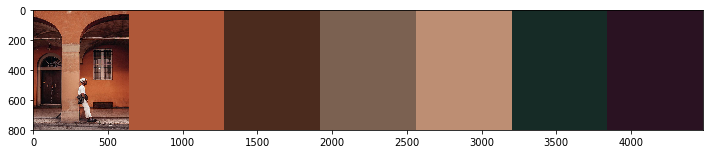

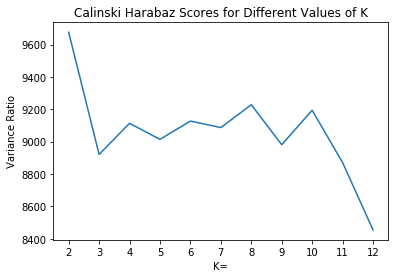

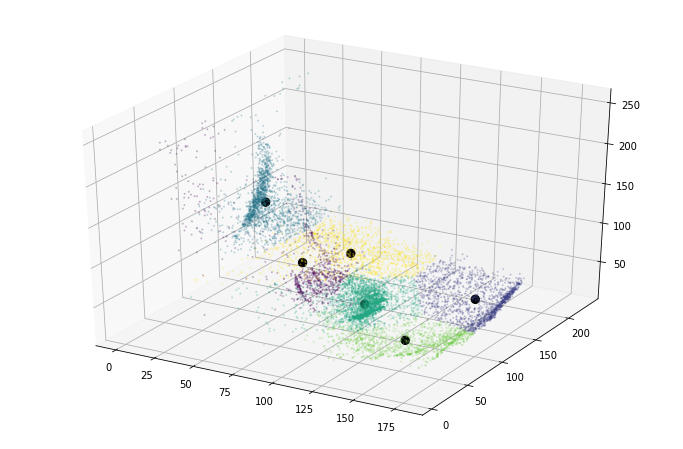

get_dominant_color function: 1.705s

Most prominent color:
red: 21  green:  29  blue:  36 
Hex:  #151d24

Second color:
red: 100  green:  29  blue:  34 
Hex:  #643a22

Third color:
red: 51  green:  29  blue:  41 
Hex:  #331829

Fourth color:
red: 27  green:  67  blue:  46 
Hex:  #1b432e

Fifth color:
red: 27  green:  21  blue:  29 
Hex:  #1b151d

Sixth color:
red: 91  green:  114  blue:  114 
Hex:  #5b7272


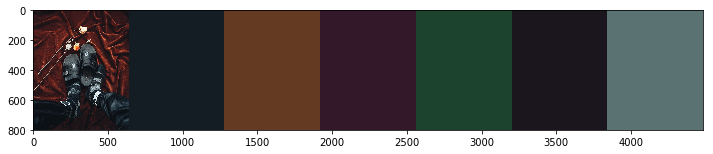

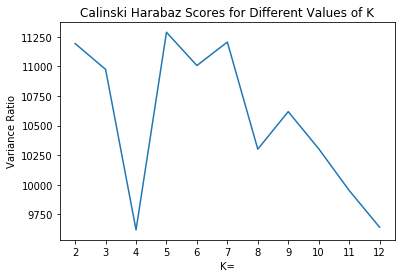

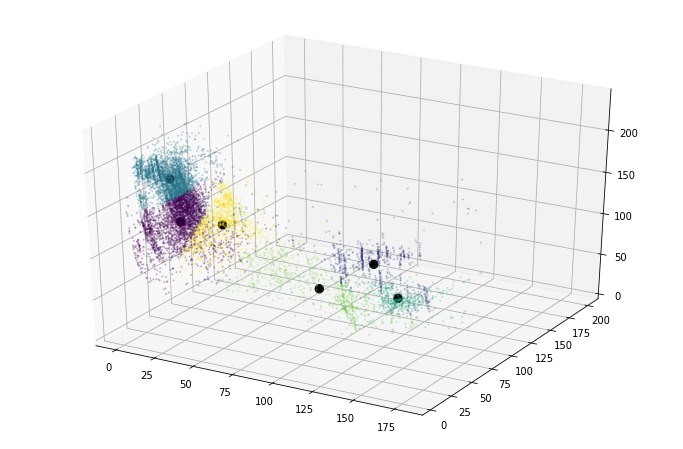

get_dominant_color function: 1.695s

Most prominent color:
red: 176  green:  159  blue:  149 
Hex:  #b09f95

Second color:
red: 122  green:  159  blue:  100 
Hex:  #7a6d64

Third color:
red: 90  green:  159  blue:  57 
Hex:  #5a4639

Fourth color:
red: 82  green:  85  blue:  91 
Hex:  #52555b

Fifth color:
red: 140  green:  132  blue:  140 
Hex:  #8c848c

Sixth color:
red: 21  green:  21  blue:  36 
Hex:  #151524


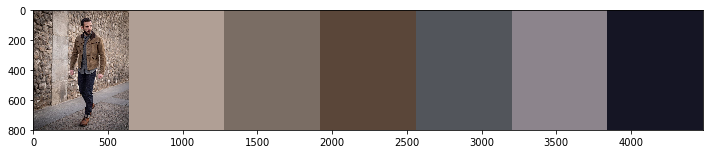

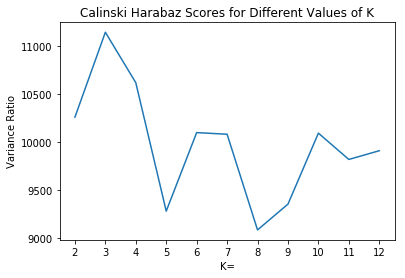

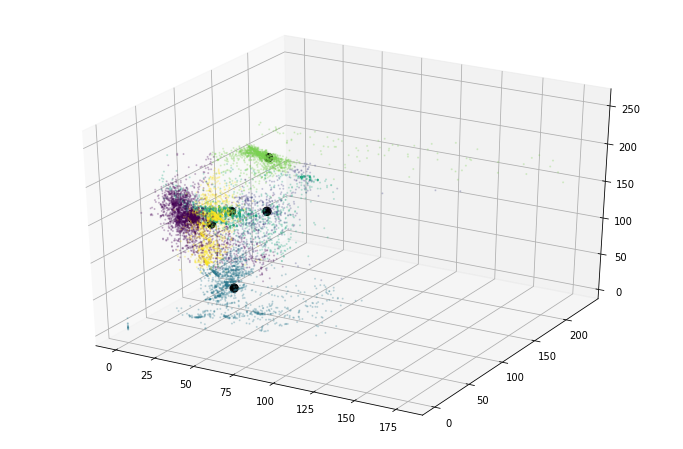

get_dominant_color function: 1.911s

Most prominent color:
red: 153  green:  153  blue:  136 
Hex:  #999988

Second color:
red: 177  green:  153  blue:  178 
Hex:  #b1b9b2

Third color:
red: 119  green:  153  blue:  85 
Hex:  #776d55

Fourth color:
red: 36  green:  39  blue:  28 
Hex:  #24271c

Fifth color:
red: 165  green:  128  blue:  64 
Hex:  #a58040

Sixth color:
red: 89  green:  65  blue:  34 
Hex:  #594122


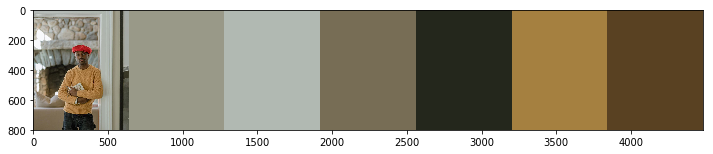

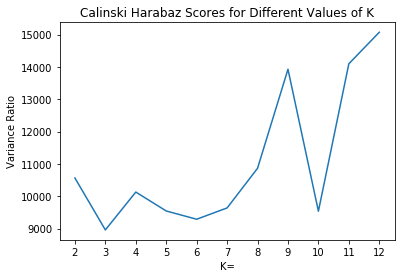

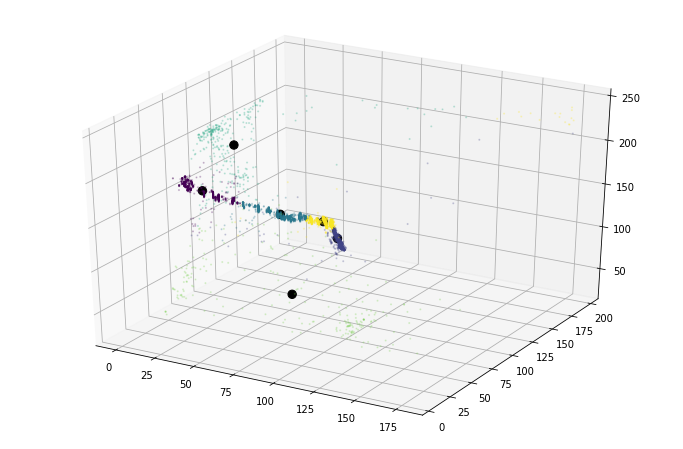

get_dominant_color function: 1.519s

Most prominent color:
red: 103  green:  125  blue:  138 
Hex:  #677d8a

Second color:
red: 127  green:  125  blue:  161 
Hex:  #7f98a1

Third color:
red: 164  green:  125  blue:  180 
Hex:  #a4b6b4

Fourth color:
red: 193  green:  200  blue:  189 
Hex:  #c1c8bd

Fifth color:
red: 204  green:  187  blue:  134 
Hex:  #ccbb86

Sixth color:
red: 44  green:  60  blue:  49 
Hex:  #2c3c31


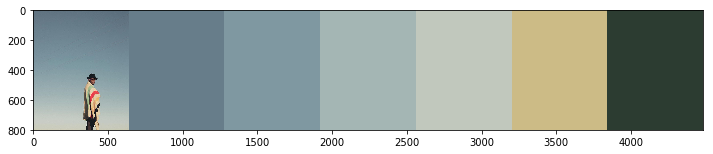

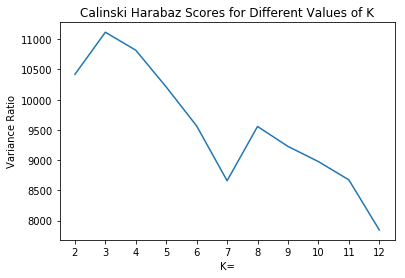

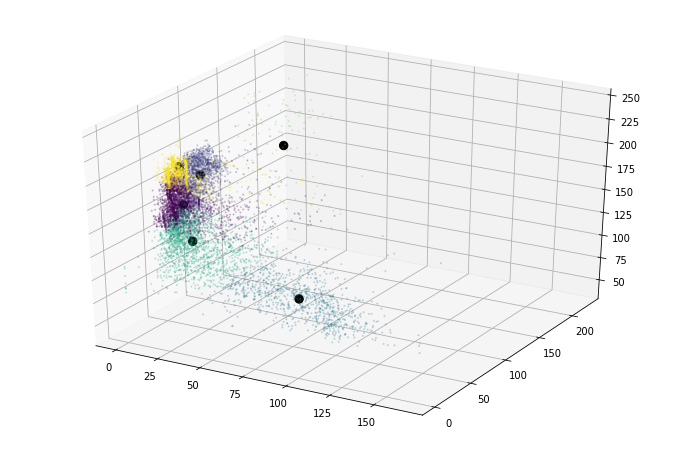

get_dominant_color function: 1.759s

Most prominent color:
red: 224  green:  225  blue:  219 
Hex:  #e0e1db

Second color:
red: 177  green:  225  blue:  162 
Hex:  #b1aea2

Third color:
red: 133  green:  225  blue:  115 
Hex:  #858273

Fourth color:
red: 186  green:  162  blue:  138 
Hex:  #baa28a

Fifth color:
red: 86  green:  97  blue:  96 
Hex:  #566160

Sixth color:
red: 184  green:  165  blue:  74 
Hex:  #b8a54a


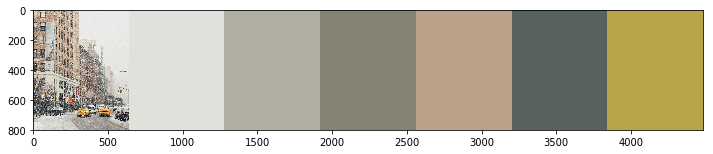

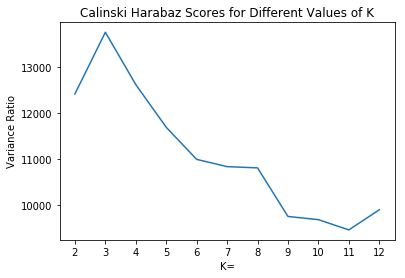

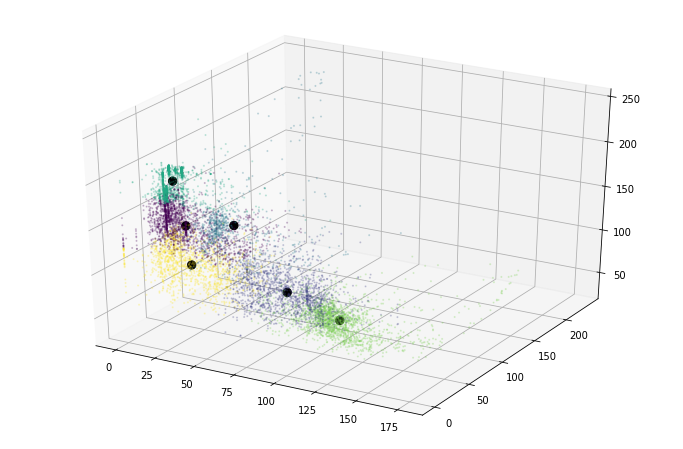

get_dominant_color function: 1.664s

Most prominent color:
red: 208  green:  207  blue:  203 
Hex:  #d0cfcb

Second color:
red: 155  green:  207  blue:  147 
Hex:  #9b9c93

Third color:
red: 50  green:  207  blue:  62 
Hex:  #32353e

Fourth color:
red: 91  green:  99  blue:  100 
Hex:  #5b6364

Fifth color:
red: 105  green:  104  blue:  93 
Hex:  #69685d

Sixth color:
red: 108  green:  85  blue:  60 
Hex:  #6c553c


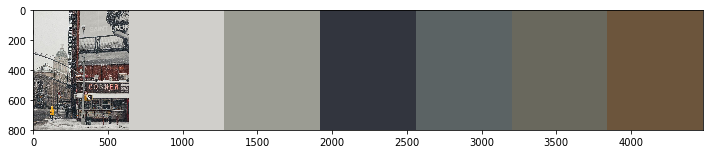

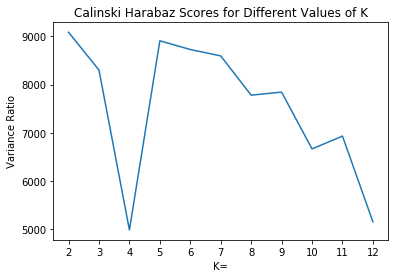

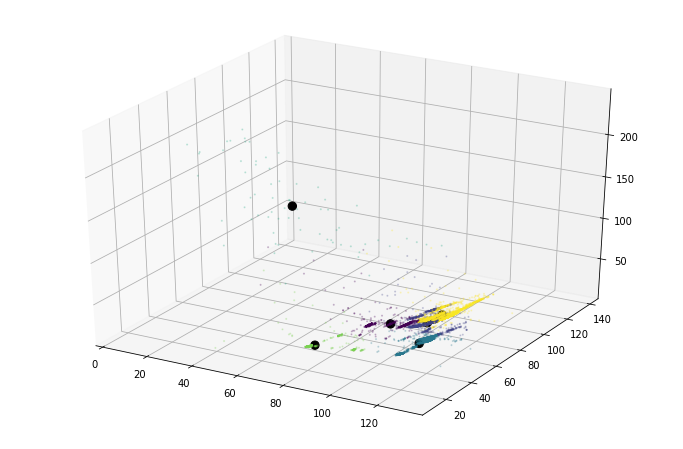

get_dominant_color function: 1.296s

Most prominent color:
red: 18  green:  21  blue:  26 
Hex:  #12151a

Second color:
red: 21  green:  21  blue:  26 
Hex:  #15161a

Third color:
red: 26  green:  21  blue:  35 
Hex:  #1a1d23

Fourth color:
red: 13  green:  17  blue:  18 
Hex:  #0d1112

Fifth color:
red: 14  green:  17  blue:  16 
Hex:  #0e1110

Sixth color:
red: 112  green:  127  blue:  90 
Hex:  #707f5a


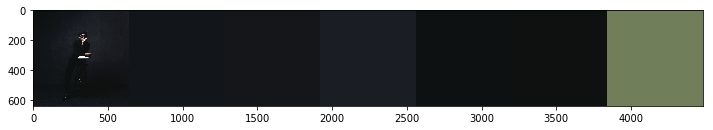

In [38]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())

for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3, dom_color_4, dom_color_5, dom_color_6 = get_dominant_color(hsv_image, k=6)
    print('get_dominant_color function: {:.3f}s'.format(time.time()-start))
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_4_hsv = np.full(bgr_image.shape, dom_color_4, dtype='uint8')
    #convert to bgr color space for display
    dom_color_4_rgb = cv2.cvtColor(dom_color_4_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_5_hsv = np.full(bgr_image.shape, dom_color_5, dtype='uint8')
    #convert to bgr color space for display
    dom_color_5_rgb = cv2.cvtColor(dom_color_5_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_6_hsv = np.full(bgr_image.shape, dom_color_6, dtype='uint8')
    #convert to bgr color space for display
    dom_color_6_rgb = cv2.cvtColor(dom_color_6_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb, dom_color_4_rgb, dom_color_5_rgb, dom_color_6_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    print('\nFourth color:\nred:', dom_color_4_rgb[0][0][0], ' green: ', dom_color_4_rgb[0][0][1],
          ' blue: ', dom_color_4_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_4_rgb[0][0][0], 
                                                                             dom_color_4_rgb[0][0][1], 
                                                                             dom_color_4_rgb[0][0][2]))
    
    print('\nFifth color:\nred:', dom_color_5_rgb[0][0][0], ' green: ', dom_color_5_rgb[0][0][1],
          ' blue: ', dom_color_5_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_5_rgb[0][0][0], 
                                                                             dom_color_5_rgb[0][0][1],
                                                                             dom_color_5_rgb[0][0][2]))
    
    print('\nSixth color:\nred:', dom_color_6_rgb[0][0][0], ' green: ', dom_color_6_rgb[0][0][1],
          ' blue: ', dom_color_6_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_6_rgb[0][0][0], 
                                                                             dom_color_6_rgb[0][0][1], 
                                                                             dom_color_6_rgb[0][0][2]))
    plt.figure(figsize=(12,6))
    plt.imshow(output_image)
    plt.show()

Mini Batch KMeans with 50 x 50 image: 

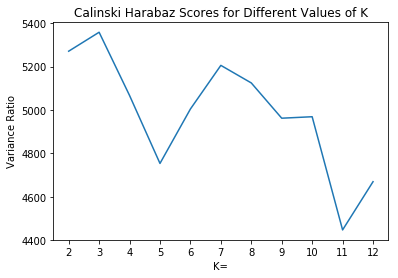

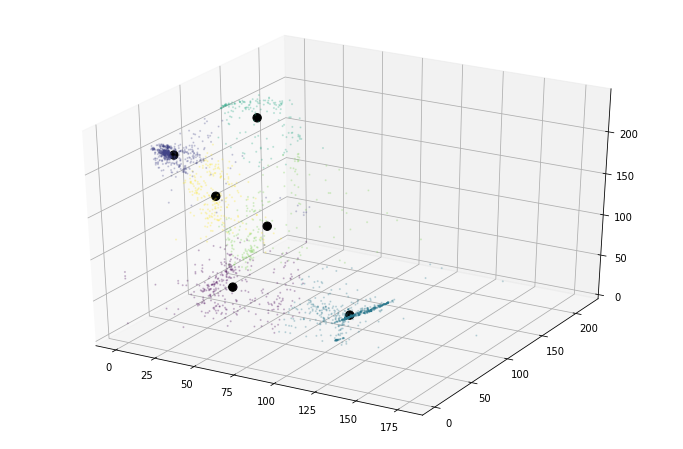

get_dominant_color function: 0.770s

Most prominent color:
red: 11  green:  16  blue:  18 
Hex:  #0b1012

Second color:
red: 214  green:  16  blue:  192 
Hex:  #d6cec0

Third color:
red: 40  green:  16  blue:  31 
Hex:  #282a1f

Fourth color:
red: 143  green:  130  blue:  102 
Hex:  #8f8266

Fifth color:
red: 71  green:  56  blue:  31 
Hex:  #47381f

Sixth color:
red: 198  green:  126  blue:  84 
Hex:  #c67e54


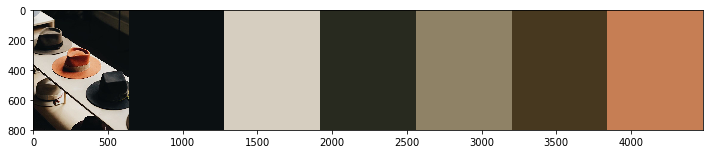

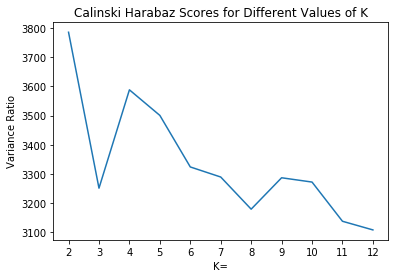

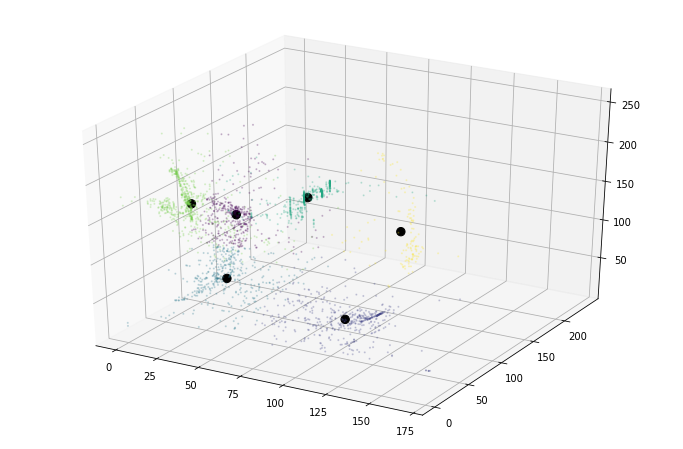

get_dominant_color function: 0.801s

Most prominent color:
red: 165  green:  160  blue:  141 
Hex:  #a5a08d

Second color:
red: 214  green:  160  blue:  220 
Hex:  #d6d9dc

Third color:
red: 19  green:  160  blue:  27 
Hex:  #13181b

Fourth color:
red: 48  green:  45  blue:  33 
Hex:  #302d21

Fifth color:
red: 108  green:  83  blue:  58 
Hex:  #6c533a

Sixth color:
red: 12  green:  66  blue:  44 
Hex:  #0c422c


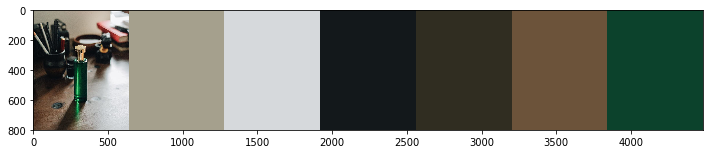

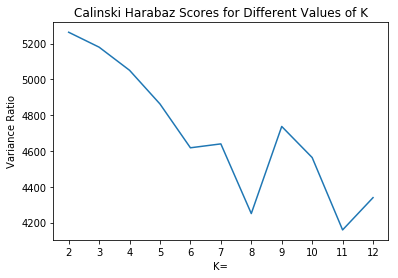

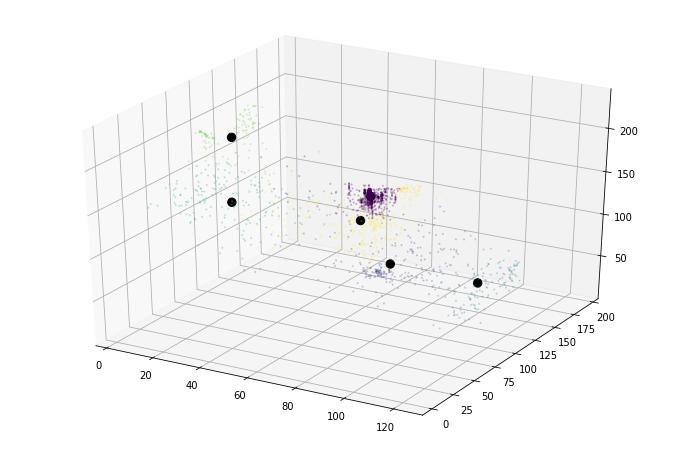

get_dominant_color function: 0.854s

Most prominent color:
red: 206  green:  211  blue:  215 
Hex:  #ced3d7

Second color:
red: 152  green:  211  blue:  172 
Hex:  #98aaac

Third color:
red: 85  green:  211  blue:  109 
Hex:  #55696d

Fourth color:
red: 139  green:  134  blue:  104 
Hex:  #8b8668

Fifth color:
red: 16  green:  30  blue:  38 
Hex:  #101e26

Sixth color:
red: 200  green:  176  blue:  135 
Hex:  #c8b087


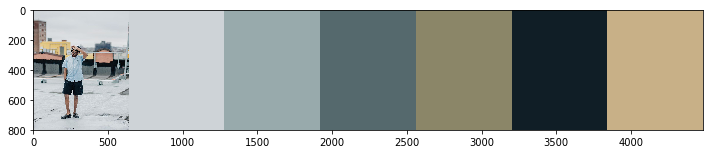

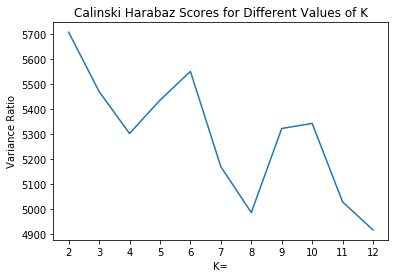

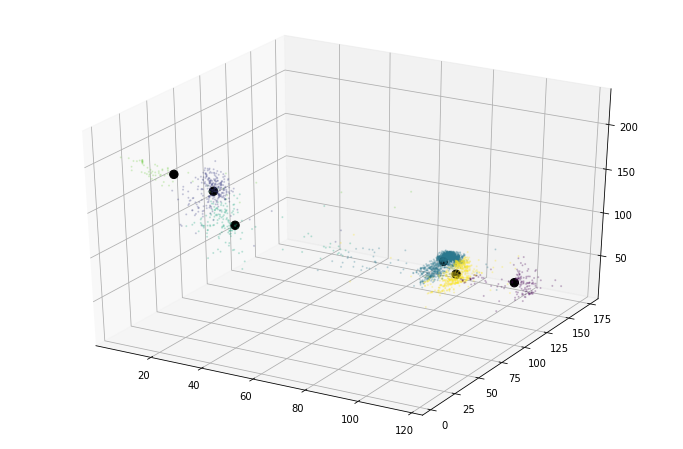

get_dominant_color function: 0.747s

Most prominent color:
red: 51  green:  79  blue:  83 
Hex:  #334f53

Second color:
red: 32  green:  79  blue:  58 
Hex:  #20373a

Third color:
red: 145  green:  79  blue:  112 
Hex:  #918470

Fourth color:
red: 104  green:  98  blue:  77 
Hex:  #68624d

Fifth color:
red: 16  green:  26  blue:  36 
Hex:  #101a24

Sixth color:
red: 193  green:  190  blue:  183 
Hex:  #c1beb7


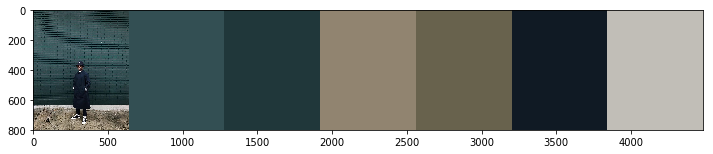

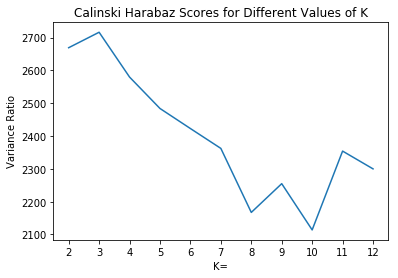

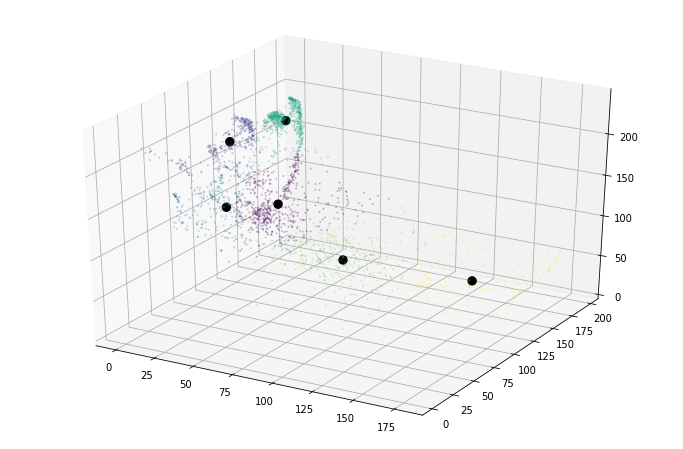

get_dominant_color function: 0.747s

Most prominent color:
red: 175  green:  88  blue:  57 
Hex:  #af5839

Second color:
red: 82  green:  88  blue:  32 
Hex:  #523420

Third color:
red: 187  green:  88  blue:  112 
Hex:  #bb8b70

Fourth color:
red: 121  green:  105  blue:  81 
Hex:  #796951

Fifth color:
red: 23  green:  47  blue:  30 
Hex:  #172f1e

Sixth color:
red: 34  green:  17  blue:  40 
Hex:  #221128


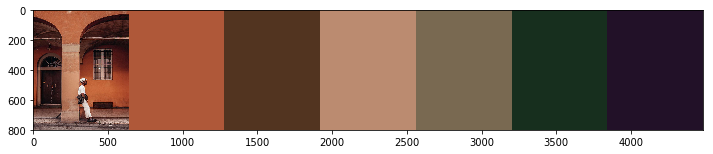

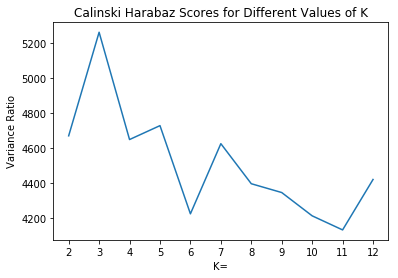

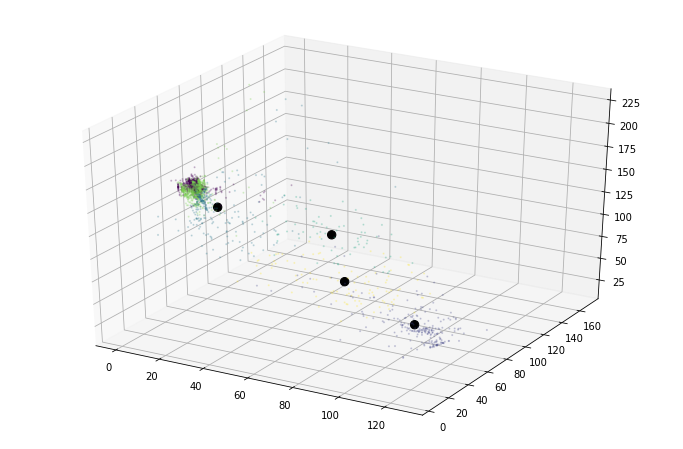

get_dominant_color function: 0.842s

Most prominent color:
red: 182  green:  181  blue:  170 
Hex:  #b6b5aa

Second color:
red: 166  green:  181  blue:  145 
Hex:  #a69f91

Third color:
red: 135  green:  181  blue:  108 
Hex:  #877e6c

Fourth color:
red: 28  green:  33  blue:  37 
Hex:  #1c2125

Fifth color:
red: 83  green:  96  blue:  93 
Hex:  #53605d

Sixth color:
red: 146  green:  157  blue:  155 
Hex:  #929d9b


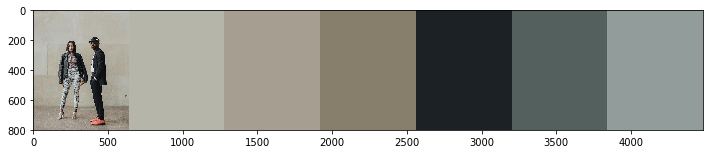

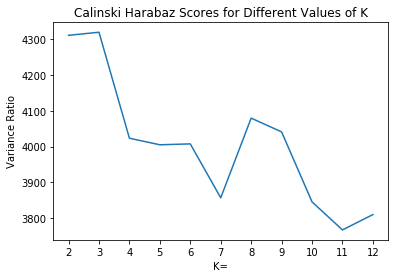

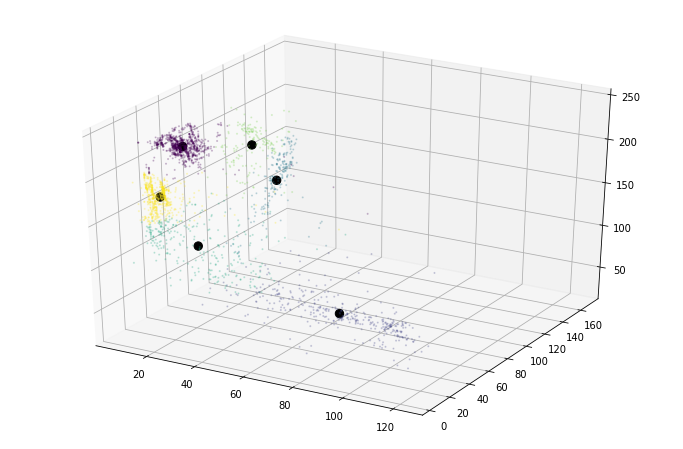

get_dominant_color function: 0.772s

Most prominent color:
red: 216  green:  197  blue:  178 
Hex:  #d8c5b2

Second color:
red: 172  green:  197  blue:  156 
Hex:  #aca39c

Third color:
red: 55  green:  197  blue:  61 
Hex:  #37413d

Fourth color:
red: 121  green:  119  blue:  108 
Hex:  #79776c

Fifth color:
red: 114  green:  71  blue:  50 
Hex:  #724732

Sixth color:
red: 175  green:  131  blue:  98 
Hex:  #af8362


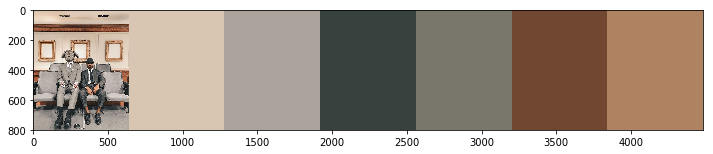

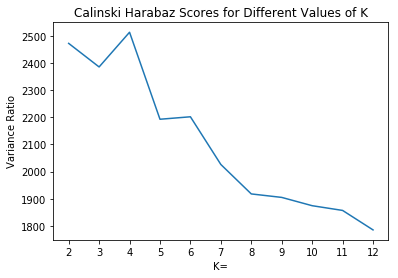

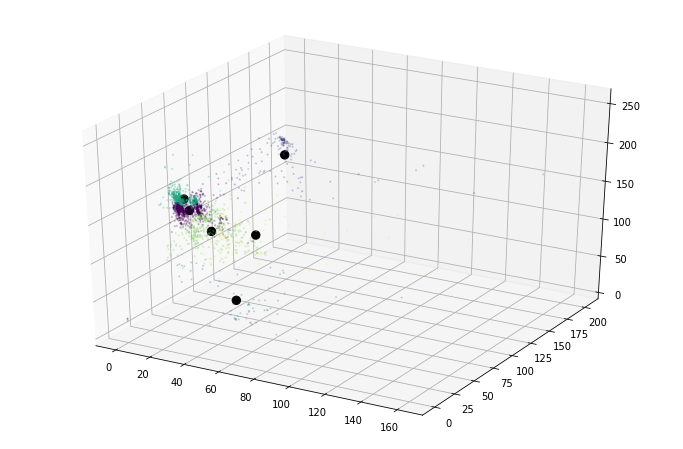

get_dominant_color function: 0.801s

Most prominent color:
red: 156  green:  150  blue:  136 
Hex:  #9c9688

Second color:
red: 174  green:  150  blue:  155 
Hex:  #aea99b

Third color:
red: 120  green:  150  blue:  96 
Hex:  #787460

Fourth color:
red: 160  green:  128  blue:  65 
Hex:  #a08041

Fifth color:
red: 40  green:  44  blue:  37 
Hex:  #282c25

Sixth color:
red: 84  green:  78  blue:  50 
Hex:  #544e32


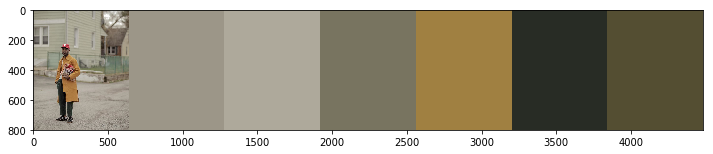

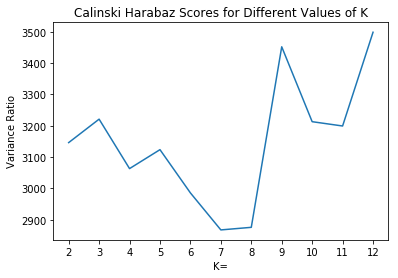

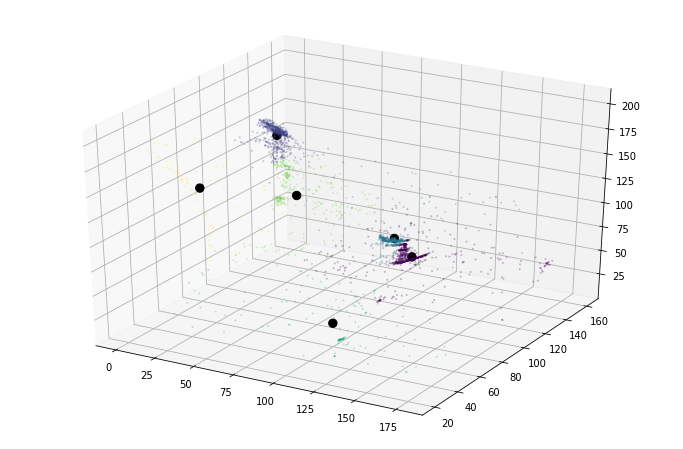

get_dominant_color function: 0.710s

Most prominent color:
red: 25  green:  38  blue:  49 
Hex:  #192631

Second color:
red: 134  green:  38  blue:  60 
Hex:  #86463c

Third color:
red: 47  green:  38  blue:  81 
Hex:  #2f4051

Fourth color:
red: 72  green:  50  blue:  31 
Hex:  #48321f

Fifth color:
red: 15  green:  19  blue:  21 
Hex:  #0f1315

Sixth color:
red: 138  green:  126  blue:  107 
Hex:  #8a7e6b


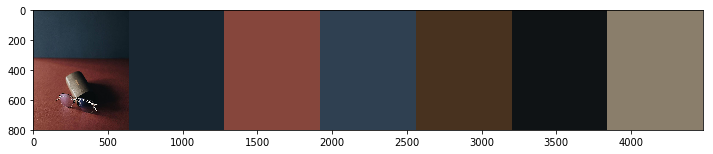

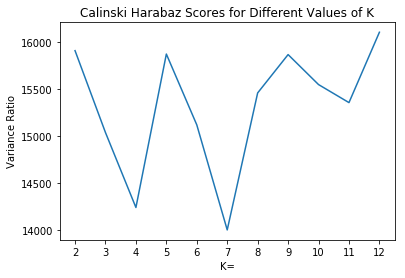

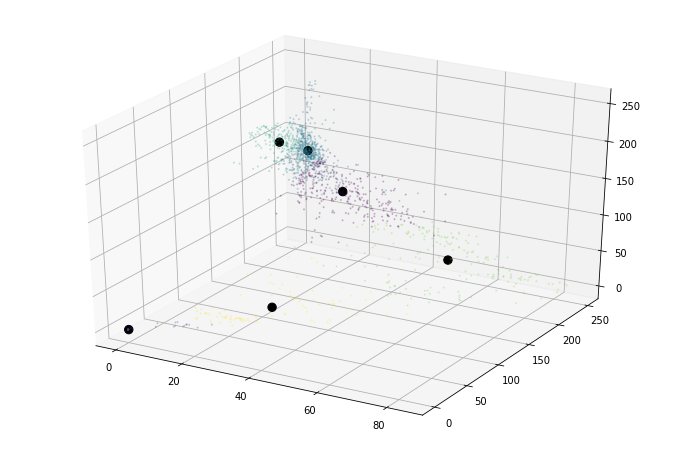

get_dominant_color function: 0.811s

Most prominent color:
red: 0  green:  0  blue:  0 
Hex:  #000000

Second color:
red: 181  green:  0  blue:  65 
Hex:  #b59241

Third color:
red: 124  green:  0  blue:  36 
Hex:  #7c7924

Fourth color:
red: 12  green:  40  blue:  8 
Hex:  #0c2808

Fifth color:
red: 216  green:  190  blue:  118 
Hex:  #d8be76

Sixth color:
red: 8  green:  7  blue:  5 
Hex:  #080705


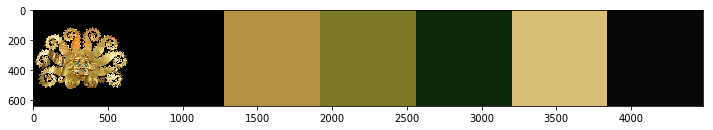

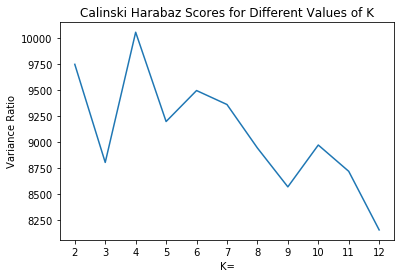

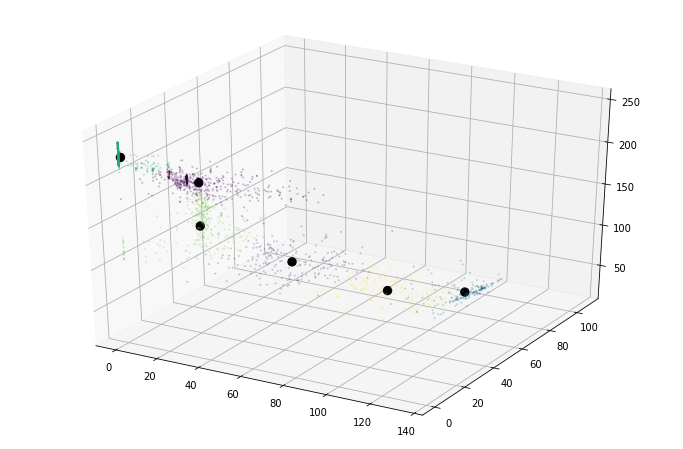

get_dominant_color function: 0.723s

Most prominent color:
red: 229  green:  229  blue:  229 
Hex:  #e5e5e5

Second color:
red: 208  green:  229  blue:  204 
Hex:  #d0d1cc

Third color:
red: 138  green:  229  blue:  127 
Hex:  #8a867f

Fourth color:
red: 97  green:  108  blue:  96 
Hex:  #616c60

Fifth color:
red: 22  green:  28  blue:  33 
Hex:  #161c21

Sixth color:
red: 62  green:  72  blue:  74 
Hex:  #3e484a


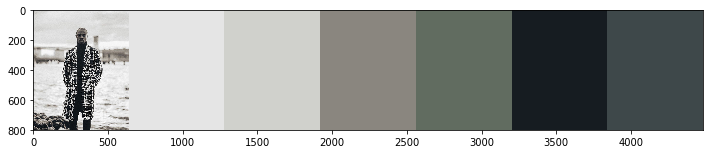

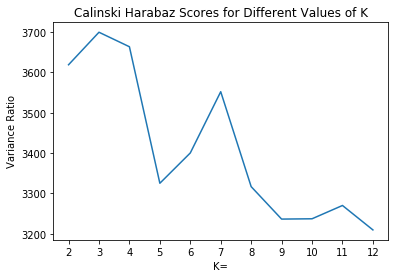

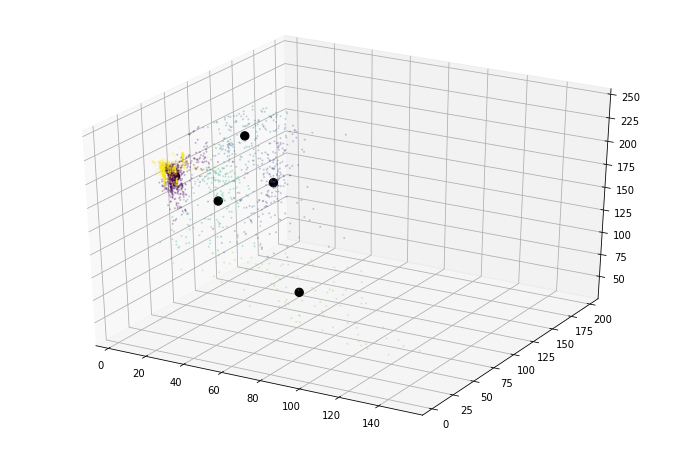

get_dominant_color function: 0.703s

Most prominent color:
red: 201  green:  195  blue:  181 
Hex:  #c9c3b5

Second color:
red: 217  green:  195  blue:  208 
Hex:  #d9d7d0

Third color:
red: 127  green:  195  blue:  51 
Hex:  #7f5433

Fourth color:
red: 149  green:  133  blue:  105 
Hex:  #958569

Fifth color:
red: 198  green:  153  blue:  108 
Hex:  #c6996c

Sixth color:
red: 67  green:  83  blue:  73 
Hex:  #435349


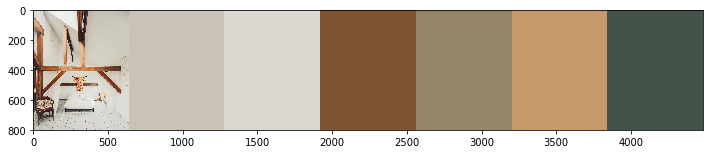

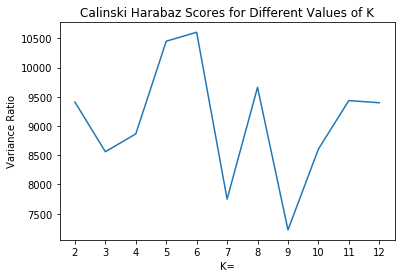

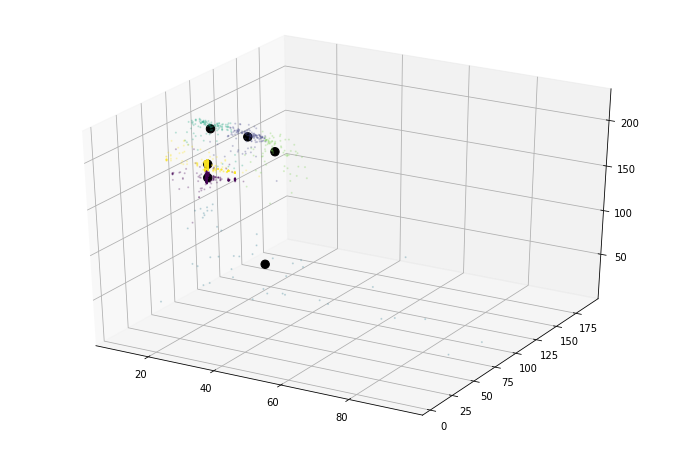

get_dominant_color function: 0.612s

Most prominent color:
red: 195  green:  197  blue:  190 
Hex:  #c3c5be

Second color:
red: 211  green:  197  blue:  207 
Hex:  #d3d4cf

Third color:
red: 168  green:  197  blue:  88 
Hex:  #a87d58

Fourth color:
red: 199  green:  168  blue:  138 
Hex:  #c7a88a

Fifth color:
red: 136  green:  93  blue:  56 
Hex:  #885d38

Sixth color:
red: 61  green:  63  blue:  44 
Hex:  #3d3f2c


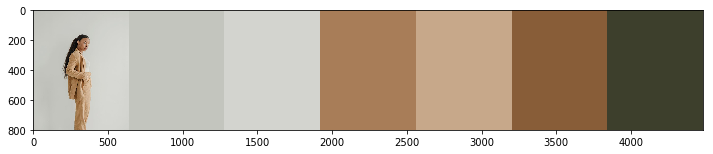

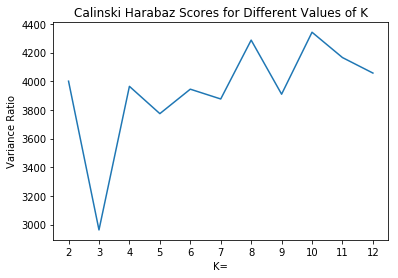

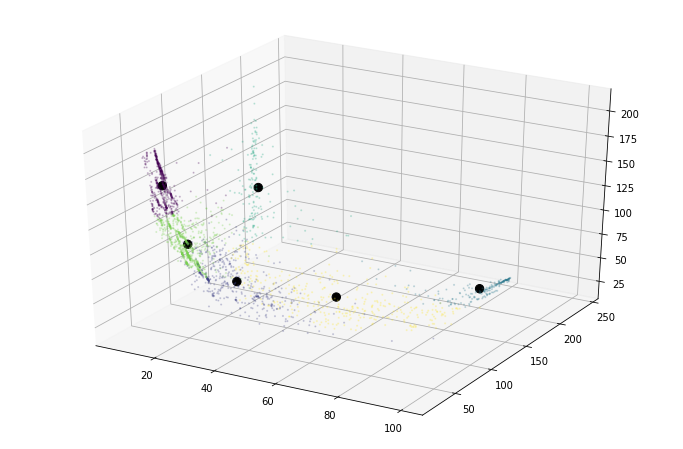

get_dominant_color function: 0.794s

Most prominent color:
red: 105  green:  99  blue:  85 
Hex:  #696355

Second color:
red: 158  green:  99  blue:  128 
Hex:  #9e8d80

Third color:
red: 66  green:  99  blue:  51 
Hex:  #424433

Fourth color:
red: 26  green:  40  blue:  22 
Hex:  #1a2816

Fifth color:
red: 4  green:  24  blue:  16 
Hex:  #041810

Sixth color:
red: 106  green:  66  blue:  35 
Hex:  #6a4223


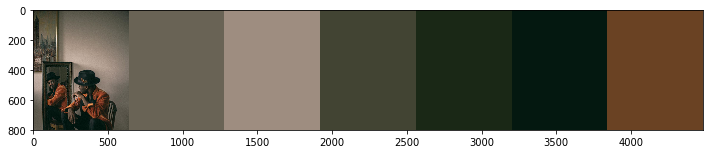

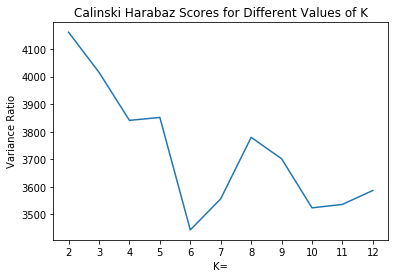

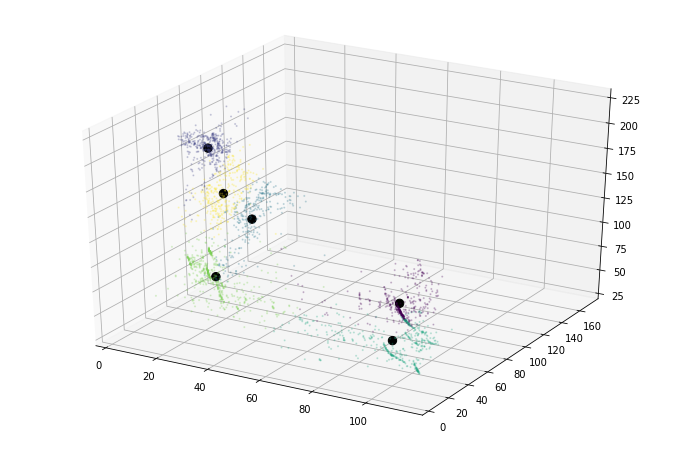

get_dominant_color function: 0.705s

Most prominent color:
red: 89  green:  89  blue:  79 
Hex:  #59594f

Second color:
red: 47  green:  89  blue:  54 
Hex:  #2f3436

Third color:
red: 192  green:  89  blue:  149 
Hex:  #c0aa95

Fourth color:
red: 83  green:  92  blue:  95 
Hex:  #535c5f

Fifth color:
red: 138  green:  116  blue:  98 
Hex:  #8a7462

Sixth color:
red: 91  green:  68  blue:  53 
Hex:  #5b4435


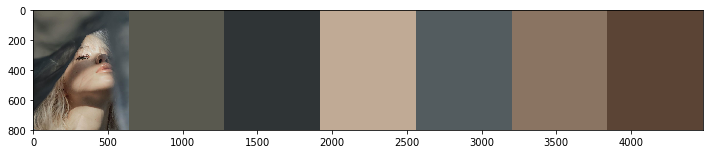

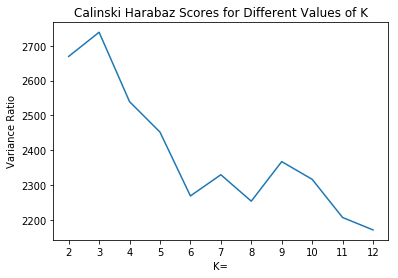

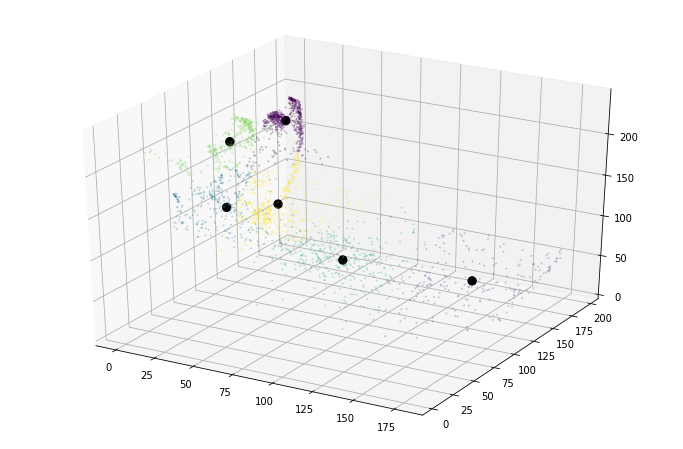

get_dominant_color function: 0.798s

Most prominent color:
red: 175  green:  88  blue:  57 
Hex:  #af5839

Second color:
red: 82  green:  88  blue:  32 
Hex:  #523420

Third color:
red: 121  green:  88  blue:  81 
Hex:  #796951

Fourth color:
red: 187  green:  139  blue:  112 
Hex:  #bb8b70

Fifth color:
red: 23  green:  47  blue:  29 
Hex:  #172f1d

Sixth color:
red: 34  green:  17  blue:  40 
Hex:  #221128


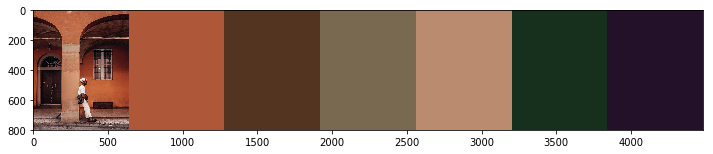

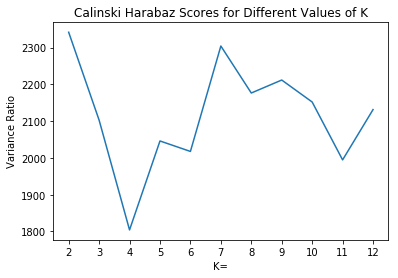

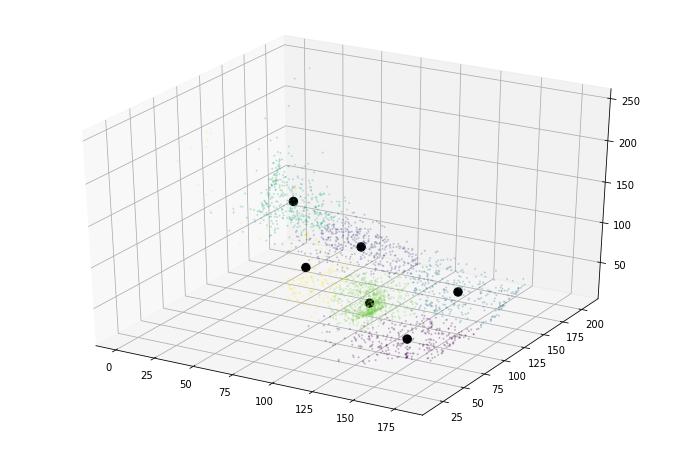

get_dominant_color function: 0.874s

Most prominent color:
red: 22  green:  30  blue:  38 
Hex:  #161e26

Second color:
red: 29  green:  30  blue:  51 
Hex:  #1d4633

Third color:
red: 99  green:  30  blue:  35 
Hex:  #635423

Fourth color:
red: 47  green:  24  blue:  51 
Hex:  #2f1833

Fifth color:
red: 28  green:  21  blue:  30 
Hex:  #1c151e

Sixth color:
red: 86  green:  106  blue:  109 
Hex:  #566a6d


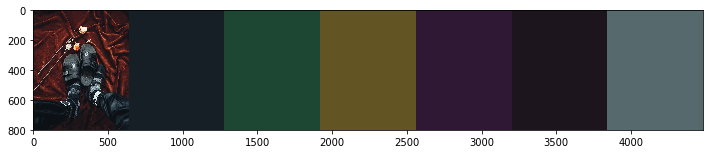

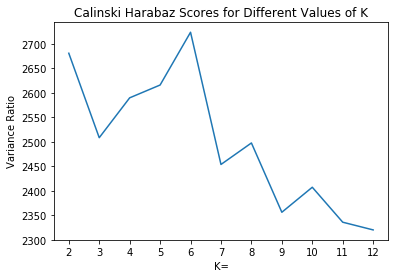

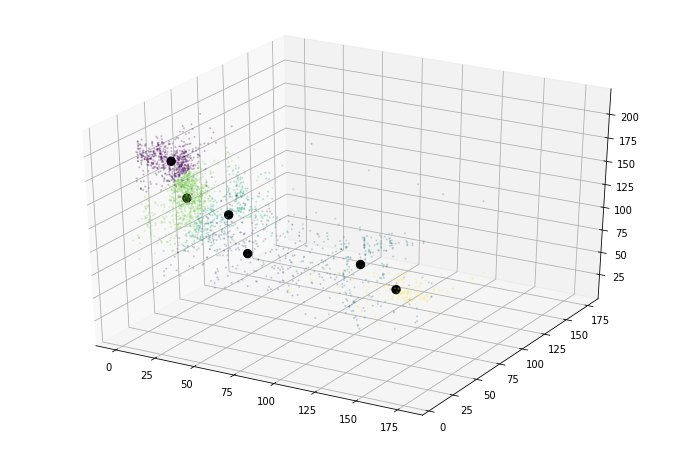

get_dominant_color function: 0.694s

Most prominent color:
red: 133  green:  117  blue:  107 
Hex:  #85756b

Second color:
red: 179  green:  117  blue:  154 
Hex:  #b3a49a

Third color:
red: 93  green:  117  blue:  61 
Hex:  #5d4b3d

Fourth color:
red: 122  green:  117  blue:  125 
Hex:  #7a757d

Fifth color:
red: 93  green:  104  blue:  94 
Hex:  #5d685e

Sixth color:
red: 27  green:  29  blue:  43 
Hex:  #1b1d2b


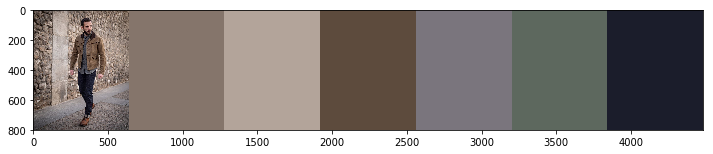

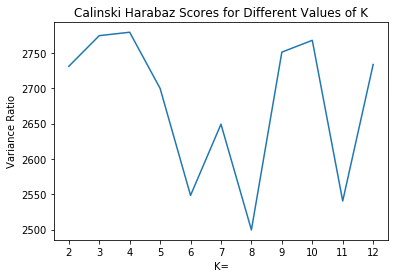

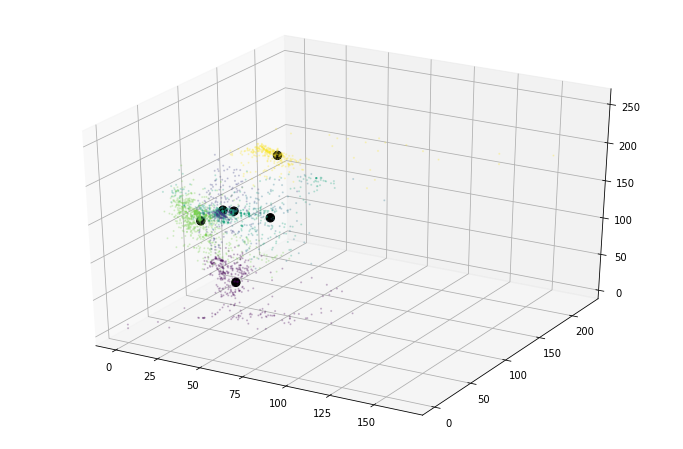

get_dominant_color function: 0.664s

Most prominent color:
red: 147  green:  148  blue:  130 
Hex:  #939482

Second color:
red: 176  green:  148  blue:  176 
Hex:  #b0b8b0

Third color:
red: 47  green:  148  blue:  37 
Hex:  #2f3225

Fourth color:
red: 128  green:  112  blue:  86 
Hex:  #807056

Fifth color:
red: 162  green:  125  blue:  62 
Hex:  #a27d3e

Sixth color:
red: 83  green:  65  blue:  35 
Hex:  #534123


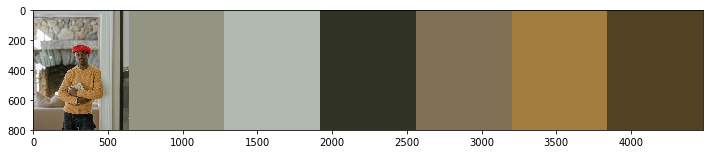

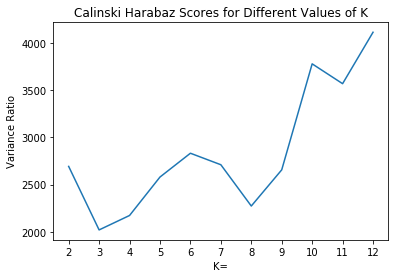

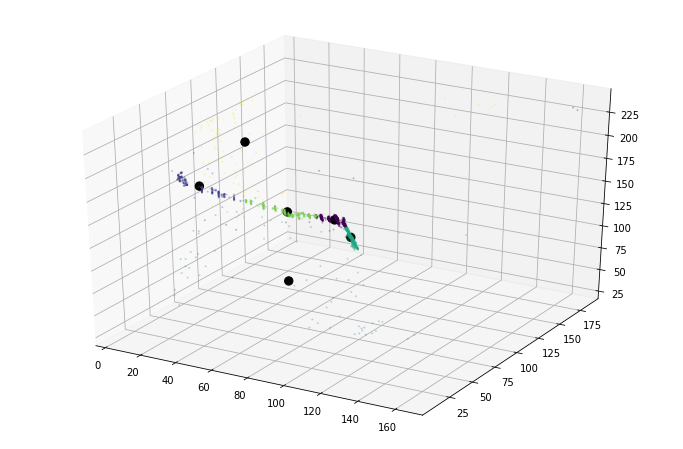

get_dominant_color function: 0.662s

Most prominent color:
red: 103  green:  125  blue:  138 
Hex:  #677d8a

Second color:
red: 127  green:  125  blue:  161 
Hex:  #7f99a1

Third color:
red: 164  green:  125  blue:  180 
Hex:  #a4b6b4

Fourth color:
red: 195  green:  201  blue:  190 
Hex:  #c3c9be

Fifth color:
red: 199  green:  202  blue:  133 
Hex:  #c7ca85

Sixth color:
red: 53  green:  72  blue:  55 
Hex:  #354837


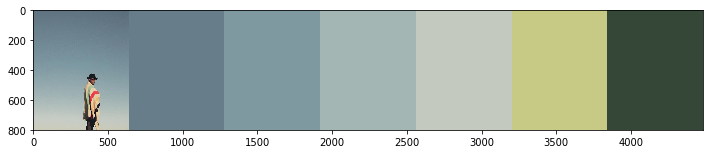

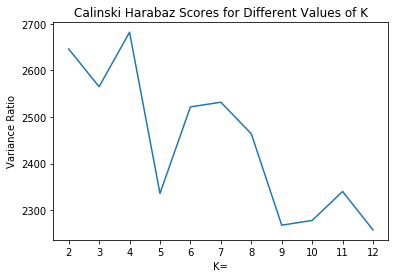

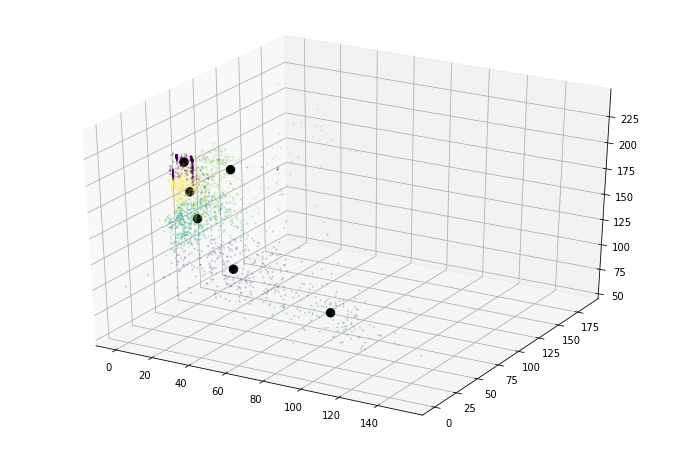

get_dominant_color function: 0.820s

Most prominent color:
red: 227  green:  228  blue:  224 
Hex:  #e3e4e0

Second color:
red: 156  green:  228  blue:  133 
Hex:  #9c9585

Third color:
red: 191  green:  228  blue:  176 
Hex:  #bfbdb0

Fourth color:
red: 184  green:  165  blue:  129 
Hex:  #b8a581

Fifth color:
red: 116  green:  123  blue:  112 
Hex:  #747b70

Sixth color:
red: 82  green:  92  blue:  94 
Hex:  #525c5e


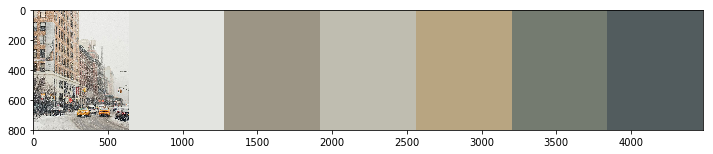

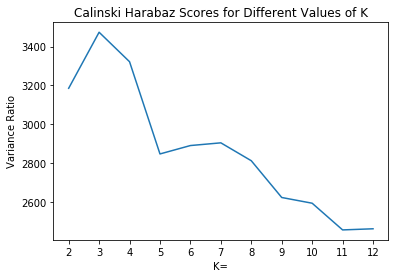

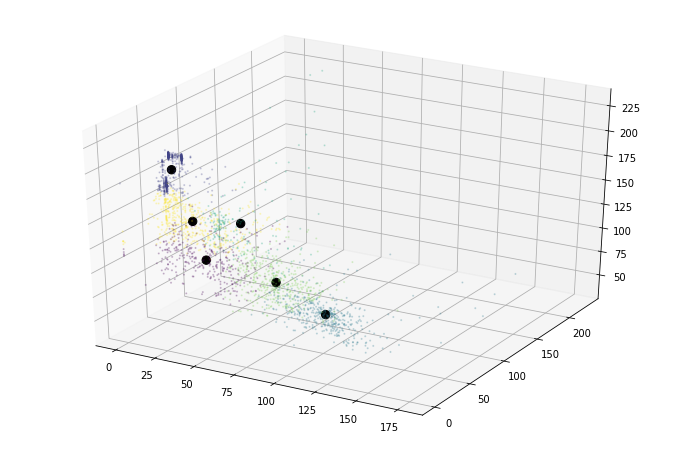

get_dominant_color function: 0.722s

Most prominent color:
red: 208  green:  207  blue:  203 
Hex:  #d0cfcb

Second color:
red: 153  green:  207  blue:  145 
Hex:  #999b91

Third color:
red: 54  green:  207  blue:  67 
Hex:  #363e43

Fourth color:
red: 95  green:  105  blue:  102 
Hex:  #5f6966

Fifth color:
red: 106  green:  109  blue:  95 
Hex:  #6a6d5f

Sixth color:
red: 108  green:  92  blue:  61 
Hex:  #6c5c3d


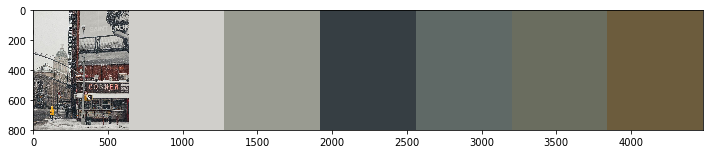

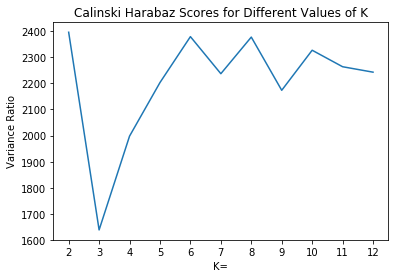

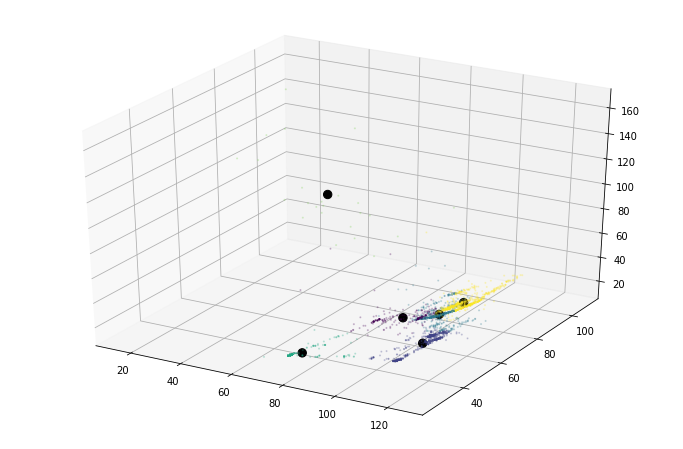

get_dominant_color function: 0.686s

Most prominent color:
red: 18  green:  21  blue:  26 
Hex:  #12151a

Second color:
red: 21  green:  21  blue:  26 
Hex:  #15161a

Third color:
red: 26  green:  21  blue:  35 
Hex:  #1a1d23

Fourth color:
red: 13  green:  17  blue:  18 
Hex:  #0d1112

Fifth color:
red: 14  green:  17  blue:  16 
Hex:  #0e1110

Sixth color:
red: 74  green:  98  blue:  69 
Hex:  #4a6245


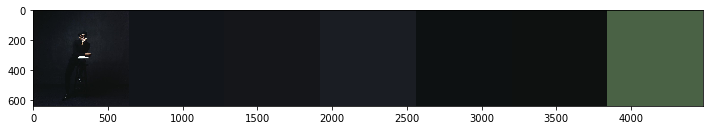

In [40]:
for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3, dom_color_4, dom_color_5, dom_color_6 = get_dominant_color(hsv_image, k=6)
    print('get_dominant_color function: {:.3f}s'.format(time.time()-start))
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_4_hsv = np.full(bgr_image.shape, dom_color_4, dtype='uint8')
    #convert to bgr color space for display
    dom_color_4_rgb = cv2.cvtColor(dom_color_4_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_5_hsv = np.full(bgr_image.shape, dom_color_5, dtype='uint8')
    #convert to bgr color space for display
    dom_color_5_rgb = cv2.cvtColor(dom_color_5_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_6_hsv = np.full(bgr_image.shape, dom_color_6, dtype='uint8')
    #convert to bgr color space for display
    dom_color_6_rgb = cv2.cvtColor(dom_color_6_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb, dom_color_4_rgb, dom_color_5_rgb, dom_color_6_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    print('\nFourth color:\nred:', dom_color_4_rgb[0][0][0], ' green: ', dom_color_4_rgb[0][0][1],
          ' blue: ', dom_color_4_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_4_rgb[0][0][0], 
                                                                             dom_color_4_rgb[0][0][1], 
                                                                             dom_color_4_rgb[0][0][2]))
    
    print('\nFifth color:\nred:', dom_color_5_rgb[0][0][0], ' green: ', dom_color_5_rgb[0][0][1],
          ' blue: ', dom_color_5_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_5_rgb[0][0][0], 
                                                                             dom_color_5_rgb[0][0][1],
                                                                             dom_color_5_rgb[0][0][2]))
    
    print('\nSixth color:\nred:', dom_color_6_rgb[0][0][0], ' green: ', dom_color_6_rgb[0][0][1],
          ' blue: ', dom_color_6_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_6_rgb[0][0][0], 
                                                                             dom_color_6_rgb[0][0][1], 
                                                                             dom_color_6_rgb[0][0][2]))
    plt.figure(figsize=(12,6))
    plt.imshow(output_image)
    plt.show()

In [ ]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

Test of getting the Hue Saturation and Value

In [ ]:
image = cv2.imread('./fohrtestimages/fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
oriimg = cv2.imread('./fohrtestimages/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

In [ ]:
plt.imshow(img)

In [ ]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [ ]:
dominant_color_1

In [ ]:
label_counts.most_common(3)[1][0]

In [ ]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [ ]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [ ]:
type(color_dict['first_color']['hex'])

In [ ]:
print(json.dumps(color_dict))